# WORLD HAPPINESS REPORT DATASET

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from scipy import stats
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

We have imported all the required libraries here.

In [2]:
df=pd.read_csv('world_happiness_report')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We have imported the dataset

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Checked all the column names

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

KEY OBSERVATIONS

Here we have checked the data types of each column and we can see that there are 2 columns of object data type 1 of integer data type and 9 columns are of float data type.

In [7]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

## Exploring Data Variables

In [8]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


KEY OBSERVATIONS

We can see that there is no null value present in the data set

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## To check the missing values

<AxesSubplot:>

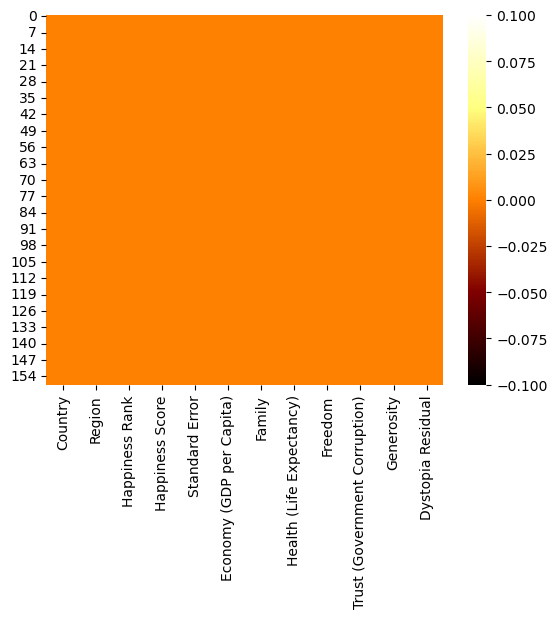

In [11]:
sns.heatmap(df.isnull(),cmap='afmhot')

In [12]:
df.Country.nunique()

158

In [13]:
df.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [14]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [15]:
df['Region'].nunique()

10

In [16]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

In [17]:
df['Happiness Rank'].nunique()

157

In [18]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [19]:
df['Happiness Score'].nunique()

157

In [20]:
df['Standard Error'].unique()

array([0.03411, 0.04884, 0.03328, 0.0388 , 0.03553, 0.0314 , 0.02799,
       0.03157, 0.03371, 0.04083, 0.0347 , 0.04454, 0.03751, 0.04176,
       0.03839, 0.04076, 0.03499, 0.03676, 0.03595, 0.03729, 0.01866,
       0.05335, 0.06476, 0.0378 , 0.0491 , 0.01848, 0.058  , 0.06257,
       0.03512, 0.04612, 0.04168, 0.04539, 0.05051, 0.03557, 0.04633,
       0.03468, 0.04206, 0.03868, 0.04456, 0.09811, 0.10895, 0.05618,
       0.05224, 0.04361, 0.04267, 0.03581, 0.04098, 0.04528, 0.05412,
       0.03914, 0.05642, 0.03799, 0.04563, 0.04114, 0.04251, 0.03843,
       0.05371, 0.04615, 0.03938, 0.04263, 0.0433 , 0.04394, 0.07832,
       0.03135, 0.13693, 0.05635, 0.0558 , 0.05099, 0.05018, 0.04175,
       0.07197, 0.04013, 0.02596, 0.03107, 0.03864, 0.03823, 0.04192,
       0.03225, 0.03363, 0.03726, 0.04524, 0.05235, 0.02424, 0.06988,
       0.06607, 0.04864, 0.04802, 0.0464 , 0.04934, 0.06161, 0.0342 ,
       0.05376, 0.07896, 0.05013, 0.06913, 0.09438, 0.07446, 0.06698,
       0.03313, 0.08

In [21]:
df['Standard Error'].nunique()

153

In [22]:
df['Economy (GDP per Capita)'].unique()

array([1.39651, 1.30232, 1.32548, 1.459  , 1.32629, 1.29025, 1.32944,
       1.33171, 1.25018, 1.33358, 1.22857, 0.95578, 1.33723, 1.02054,
       1.39451, 0.98124, 1.56391, 1.33596, 1.30782, 1.42727, 1.26637,
       1.36011, 1.04424, 1.52186, 1.06353, 1.32792, 1.10715, 1.69042,
       1.27778, 1.05351, 1.17898, 1.06166, 0.91861, 0.9669 , 1.39541,
       1.23011, 1.2074 , 1.29098, 1.55422, 0.99534, 1.21183, 0.76454,
       0.74553, 0.63244, 1.16891, 1.27074, 1.24461, 0.86402, 1.32376,
       1.25114, 0.68133, 0.59448, 0.75985, 1.12254, 1.18498, 1.14723,
       0.59325, 0.90019, 1.03192, 1.12555, 1.12486, 1.08254, 1.13145,
       1.13764, 0.81038, 1.20806, 1.20813, 0.93929, 0.80148, 0.95847,
       1.00761, 1.38604, 1.15174, 0.82827, 0.63216, 1.06098, 0.47428,
       0.65435, 0.77042, 1.02389, 0.59543, 0.90198, 0.97438, 0.89012,
       0.47038, 1.04345, 0.92053, 1.15991, 1.11312, 0.70532, 0.18847,
       0.73479, 0.91851, 0.08308, 0.87867, 0.83223, 0.37545, 0.89537,
       0.59066, 0.82

In [23]:
df['Economy (GDP per Capita)'].nunique()

158

In [24]:
df['Family'].unique()

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

In [25]:
df['Family'].nunique()

158

In [26]:
df['Health (Life Expectancy)'].unique()

array([0.94143, 0.94784, 0.87464, 0.88521, 0.90563, 0.88911, 0.89284,
       0.91087, 0.90837, 0.93156, 0.91387, 0.86027, 0.89042, 0.81444,
       0.86179, 0.69702, 0.91894, 0.89533, 0.89667, 0.80925, 0.90943,
       0.76276, 0.72052, 1.02525, 0.79661, 0.89186, 0.85857, 0.79733,
       0.94579, 0.78723, 0.84483, 0.8116 , 0.69077, 0.7385 , 0.72025,
       0.95562, 0.88721, 0.8753 , 0.72492, 0.6082 , 0.61483, 0.67737,
       0.64425, 0.59772, 0.78902, 0.99111, 0.96538, 0.79075, 0.74716,
       0.95446, 0.5392 , 0.61826, 0.66098, 0.64368, 0.87337, 0.73128,
       0.74314, 0.73017, 0.73608, 0.77903, 0.72394, 0.78805, 0.7038 ,
       0.66926, 0.68741, 0.92356, 0.61766, 0.63132, 0.53886, 0.7095 ,
       1.01328, 0.77361, 0.63793, 0.74676, 0.73172, 0.65088, 0.16007,
       0.57407, 0.64045, 0.51466, 0.69639, 0.72521, 0.81658, 0.29924,
       0.7689 , 0.74836, 0.87519, 0.72437, 0.58114, 0.43873, 0.60954,
       0.73545, 0.09131, 0.81325, 0.79081, 0.07612, 0.66825, 0.54909,
       0.60268, 0.07

In [27]:
df['Health (Life Expectancy)'].nunique()

157

In [28]:
df['Freedom'].unique()

array([0.66557, 0.62877, 0.64938, 0.66973, 0.63297, 0.64169, 0.61576,
       0.6598 , 0.63938, 0.65124, 0.41319, 0.63376, 0.62433, 0.48181,
       0.54604, 0.49049, 0.61583, 0.61777, 0.5845 , 0.64157, 0.59625,
       0.63274, 0.42908, 0.54252, 0.5421 , 0.61477, 0.44132, 0.6404 ,
       0.55011, 0.44974, 0.46364, 0.60362, 0.53466, 0.55664, 0.31048,
       0.45951, 0.60365, 0.3974 , 0.55499, 0.59657, 0.55884, 0.4035 ,
       0.57733, 0.65821, 0.31751, 0.49615, 0.33208, 0.48574, 0.45492,
       0.26236, 0.57414, 0.32818, 0.53899, 0.51649, 0.60855, 0.21342,
       0.55475, 0.41496, 0.37938, 0.53122, 0.53024, 0.25883, 0.41668,
       0.36679, 0.50442, 0.49027, 0.40672, 0.28579, 0.24749, 0.4761 ,
       0.56066, 0.59608, 0.44888, 0.46611, 0.59444, 0.22815, 0.43477,
       0.34334, 0.53206, 0.3703 , 0.12102, 0.40661, 0.1826 , 0.51697,
       0.48827, 0.35068, 0.20107, 0.51469, 0.29671, 0.62545, 0.46582,
       0.41691, 0.33457, 0.34037, 0.35733, 0.09245, 0.31767, 0.57672,
       0.59591, 0.43

In [29]:
df['Freedom'].nunique()

158

In [30]:
df['Trust (Government Corruption)'].unique()

array([0.41978, 0.14145, 0.48357, 0.36503, 0.32957, 0.41372, 0.31814,
       0.43844, 0.42922, 0.35637, 0.07785, 0.10583, 0.18676, 0.21312,
       0.1589 , 0.17521, 0.37798, 0.28703, 0.2254 , 0.38583, 0.32067,
       0.32524, 0.11069, 0.4921 , 0.0927 , 0.21843, 0.12869, 0.52208,
       0.20646, 0.08484, 0.02652, 0.24558, 0.0512 , 0.03187, 0.06398,
       0.13586, 0.08129, 0.25609, 0.13633, 0.0114 , 0.11776, 0.09472,
       0.30826, 0.03431, 0.1806 , 0.07857, 0.1809 , 0.306  , 0.02901,
       0.088  , 0.01615, 0.08242, 0.08454, 0.03787, 0.01031, 0.19317,
       0.05989, 0.1909 , 0.04212, 0.10501, 0.0243 , 0.11023, 0.03005,
       0.02299, 0.1428 , 0.06146, 0.17383, 0.04741, 0.30844, 0.07521,
       0.37124, 0.15184, 0.     , 0.10441, 0.15746, 0.04232, 0.0403 ,
       0.15445, 0.16065, 0.10464, 0.14293, 0.14296, 0.02781, 0.12468,
       0.00649, 0.02617, 0.01078, 0.06332, 0.12279, 0.39928, 0.08546,
       0.05327, 0.15603, 0.06413, 0.00227, 0.12504, 0.14234, 0.24249,
       0.02666, 0.03

In [31]:
df['Trust (Government Corruption)'].nunique()

157

In [32]:
df['Generosity'].unique()

array([0.29678, 0.4363 , 0.34139, 0.34699, 0.45811, 0.23351, 0.4761 ,
       0.36262, 0.47501, 0.43562, 0.33172, 0.25497, 0.33088, 0.14074,
       0.40105, 0.14574, 0.28034, 0.45901, 0.2225 , 0.26428, 0.51912,
       0.21542, 0.05841, 0.31105, 0.24434, 0.28214, 0.33363, 0.32573,
       0.12332, 0.11451, 0.10686, 0.2324 , 0.18401, 0.5763 , 0.13706,
       0.18227, 0.51752, 0.25376, 0.16228, 0.16991, 0.31844, 0.10692,
       0.27489, 0.22837, 0.16893, 0.10705, 0.18557, 0.11541, 0.17362,
       0.22823, 0.20536, 0.20951, 0.3424 , 0.11827, 0.25328, 0.02641,
       0.27815, 0.14982, 0.11046, 0.16759, 0.33075, 0.05444, 0.18295,
       0.00199, 0.2123 , 0.26169, 0.30638, 0.07822, 0.2831 , 0.16979,
       0.37744, 0.39478, 0.0868 , 0.51535, 0.1686 , 0.12253, 0.3003 ,
       0.27233, 0.47998, 0.07799, 0.33671, 0.11053, 0.1614 , 0.08185,
       0.19591, 0.13748, 0.19231, 0.13719, 0.18226, 0.24991, 0.50318,
       0.07172, 0.22359, 0.22269, 0.14272, 0.24808, 0.16388, 0.21684,
       0.42192, 0.33

In [33]:
df['Generosity'].nunique()

158

In [34]:
df['Dystopia Residual'].unique()

array([2.51738, 2.70201, 2.49204, 2.46531, 2.45176, 2.61955, 2.4657 ,
       2.37119, 2.26425, 2.26646, 3.08854, 3.17728, 2.5332 , 3.60214,
       2.51011, 3.26001, 1.96961, 1.9757 , 2.41484, 2.24743, 1.96994,
       2.47489, 3.19131, 1.88501, 2.84848, 2.11569, 2.67585, 1.55674,
       2.21126, 2.836  , 2.67782, 2.32142, 2.85737, 2.31945, 2.43872,
       2.12367, 1.6488 , 2.32323, 1.87634, 2.79094, 2.26882, 3.035  ,
       2.74255, 2.23741, 2.24639, 1.68435, 2.21978, 2.53942, 1.73797,
       2.02518, 2.82334, 3.10712, 2.18896, 2.24729, 1.61583, 2.44649,
       2.32407, 2.5945 , 2.1309 , 1.86565, 1.88541, 2.75414, 2.09066,
       2.27394, 2.32038, 1.59888, 1.88931, 2.43209, 2.76579, 1.86984,
       1.76145, 0.65429, 1.58782, 1.86399, 2.20173, 2.08528, 2.2327 ,
       2.89319, 1.63794, 2.00073, 3.10709, 1.87996, 2.10017, 1.8604 ,
       2.6343 , 1.93129, 2.025  , 1.26462, 1.62215, 1.7536 , 2.11032,
       2.45373, 1.73933, 3.05137, 1.89894, 2.06367, 2.79832, 1.21305,
       1.73799, 1.34

In [35]:
df['Dystopia Residual'].nunique()

158

In [36]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [37]:
df.shape

(158, 12)

KEY IBSERVATIONS

The data set has 158 rows and 12 columns

## Separating Categorical columns and Numerical columns

In [38]:
#Checking for Categorical Columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns: ',categorical_col)
print('\n')

#checking for Numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)
    

categorical columns:  ['Country', 'Region']


Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


KEY OBSERVATION

We have separated the Categorical and Numerical Columns.

There are 2 columns that are categorical and rest are numerical

In [39]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


KEY OBSERVATION

No of unique values present in each column is written for each column 

## Description of Dataset

In [40]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


KEY OBSERVATION

Here we have checked the descriptio of dataset.

We can see that the mean value is slightly greater than the median value in happiness score, Economy, Health, Freedom, Trust column and there is not much difference in other columns.

The std deviation of Happiness Rank is vary high which means it is widely spread.

The difference between the 75% and max value in Happiness rank is very high as compared to other columns hence we concule the presence of some outliers.


## Data Visualization

### Univariate Analysis

Performed on categorical data only.

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


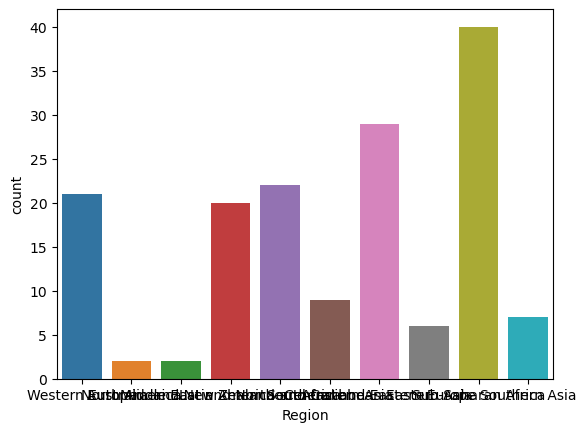

In [41]:
sns.countplot(df['Region'])
print(df['Region'].value_counts())

### Bivariate Analysis

Text(0, 0.5, 'Economy(GDP per capita)')

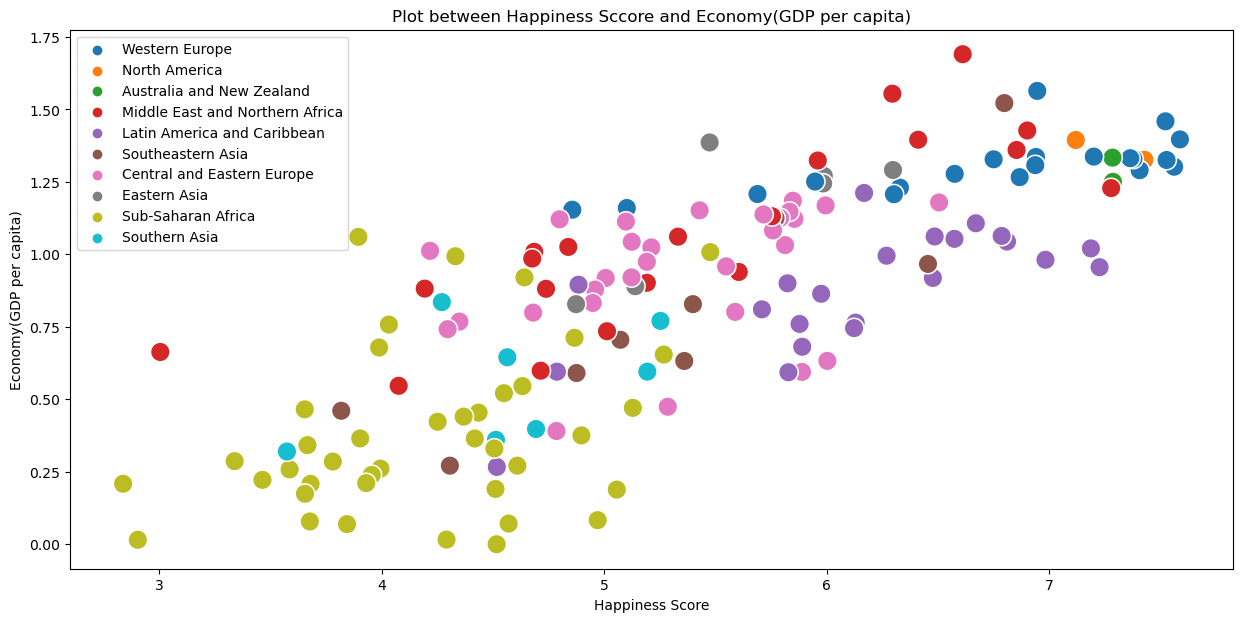

In [42]:
#Graph Between Happiness Score and Economy
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Sccore and Economy(GDP per capita)')
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',hue='Region',s=200,data=df)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per capita)')


KEY OBSERVATIONS

We can see here the Economy is directly propertional to Happiness Score. When the GDP of a country increases the happiness score is also increasing.

Western European countries has highest Economy i.e. GDP per capita and happiness score lies between 5 and 7.9

North America has highest economy and its happiness score is also very high

If we observe the Middle east and Northern African countries then we can see that they have a medium to high economy rate and their happiness score lies between 4.5 and 7.5, we can also observe here a country even after having0 medium economy the happiness score is very low so we will consider this as an outliers.

Latin America and Caribbean countries have a medium to high economy rate and their happiness score lies between 4.5 and 7.5

Southeast Asian countries have a low to medium economy rate and their happiness score lies between 3.5 and 6.5

Centeral and eastern European countries  have a medium to high economy rate and their happiness score lies between 4.5 and 6.5.

Eastern Asian countries mediocer economy rate and their happiness score lies between 4.5 and 5.5

Sub saharan african countries has medium to low economy and hence its happiness score lier between 2.5 and 5.5.

Southern American countries have a low to medium economy rate and their happiness score lies between 3.5 and 5.5


In [45]:
#TO UNDERSTAND gdp per region
gdp_region=df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, 'Family')

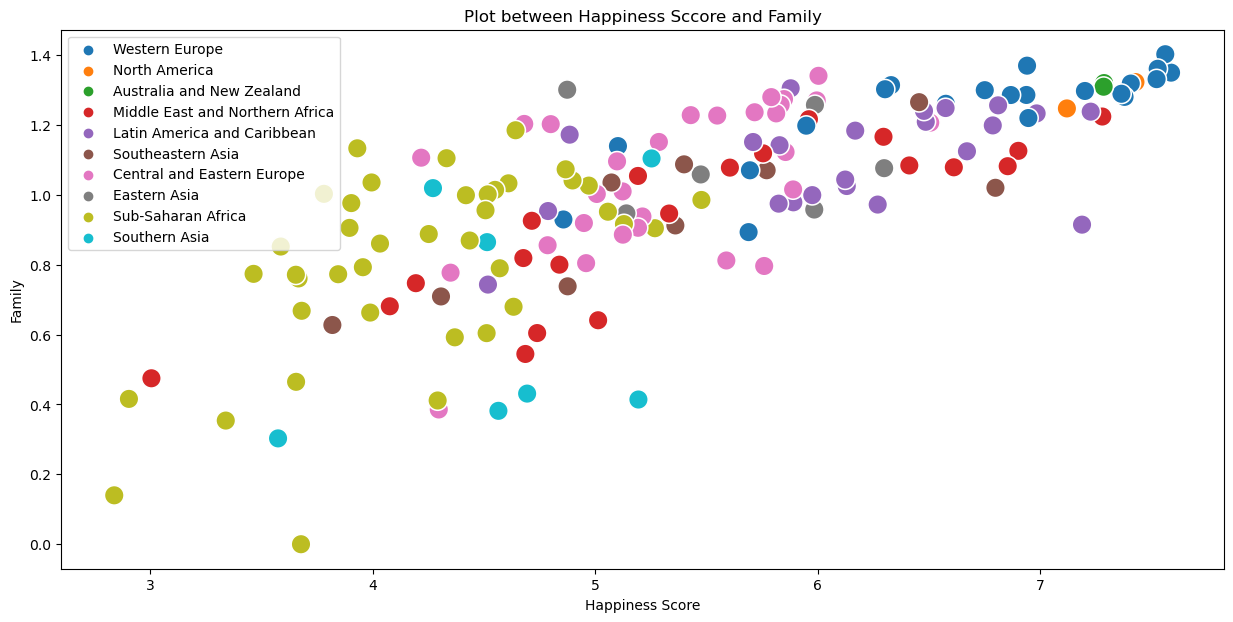

In [52]:
#Graph Between Happiness Score and Family
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Sccore and Family')
sns.scatterplot(x='Happiness Score',y='Family',hue='Region',s=200,data=df)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Family')


Text(0, 0.5, 'Health (Life Expectancy)')

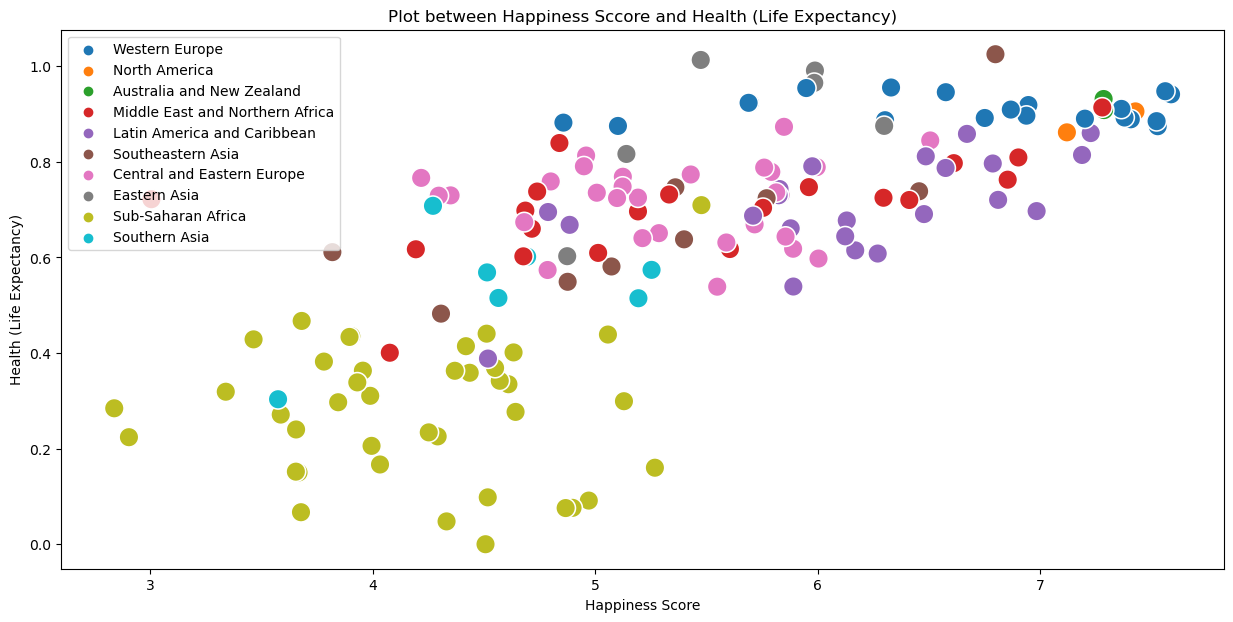

In [53]:
#Graph Between Happiness Score and Health (Life Expectancy)
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Sccore and Health (Life Expectancy)')
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',hue='Region',s=200,data=df)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')


KEY OBSERVATIONS

Here we can observe that the life expectency in the sub saharan African countries lies between low to medium and their happiness score lies between 2 to 5.5

Similarly the life expectency of Western European Countries are very high and hence their happiness score is also between 4.8 to 8

Text(0, 0.5, 'Freedom')

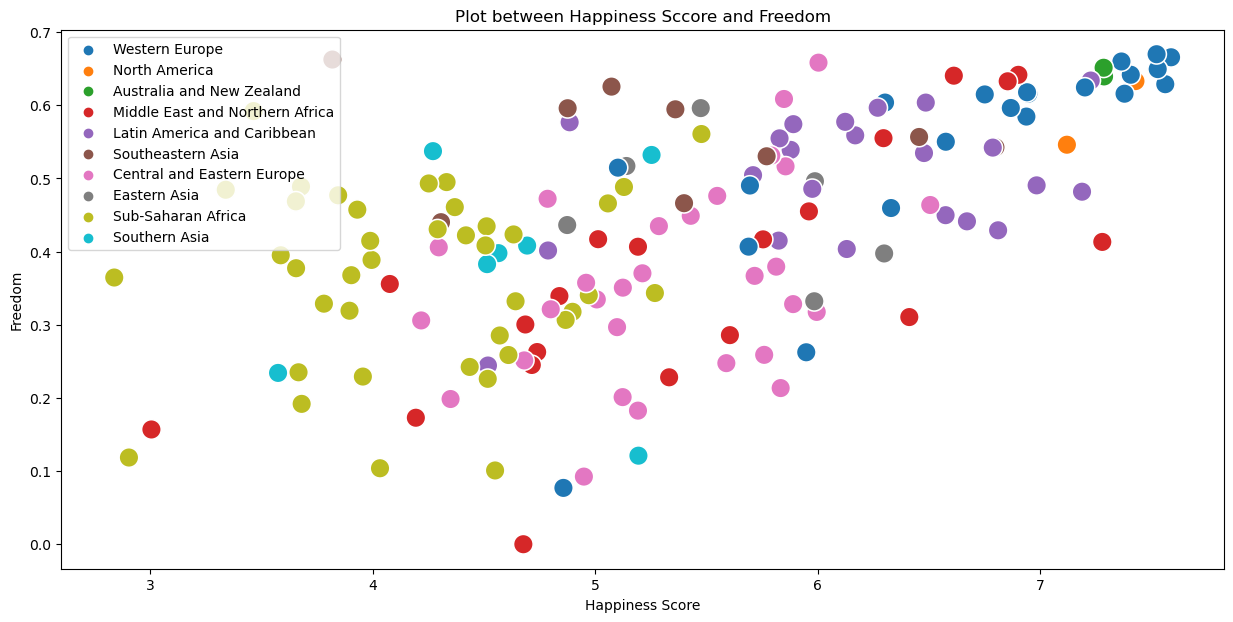

In [54]:
#Graph Between Happiness Score and Freedom
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Sccore and Freedom')
sns.scatterplot(x='Happiness Score',y='Freedom',hue='Region',s=200,data=df)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')


Here we can observe that the freedom is very explicit with the happiness score.

Latin America, Caribbean, North America and Western European countries have high freedom and so is their happiness score.

Middle East and Northern American Countries are exponentially increaasing.

Sub- Saharan African Countries have freedom of low to medium and so their happiness score. But we can also observe some outliers present there.



Text(0, 0.5, 'Dystopia Residual')

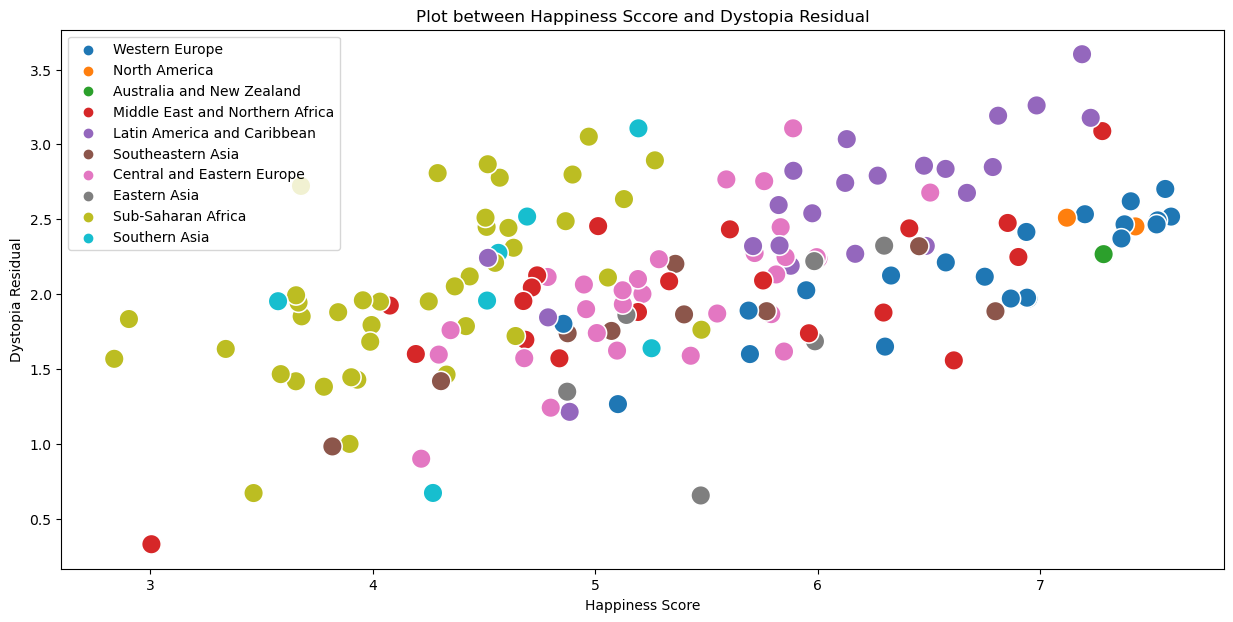

In [57]:
#Graph Between Happiness Score and Dystopia Residual
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Sccore and Dystopia Residual')
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',hue='Region',s=200,data=df)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')

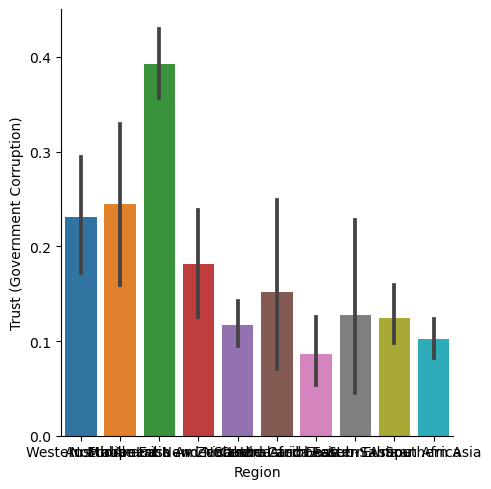

In [61]:
sns.catplot(x='Region',y='Trust (Government Corruption)',data=df,kind='bar')

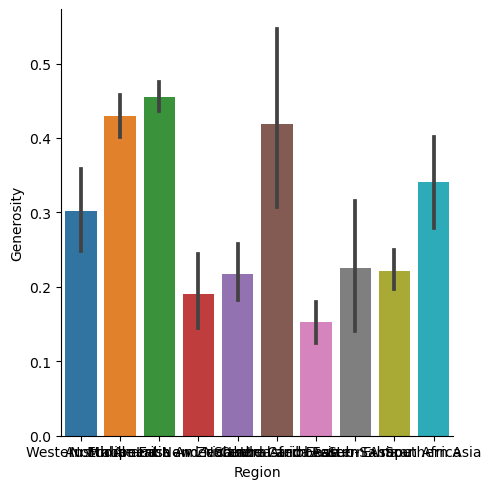

In [66]:
sns.catplot(x='Region',y='Generosity',data=df,kind='bar')

### Multivariate Analysis

Happiness Rank                      AxesSubplot(0.125,0.53;0.133621x0.35)
Happiness Score                  AxesSubplot(0.285345,0.53;0.133621x0.35)
Standard Error                    AxesSubplot(0.44569,0.53;0.133621x0.35)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.53;0.133621x0.35)
Family                           AxesSubplot(0.766379,0.53;0.133621x0.35)
Health (Life Expectancy)            AxesSubplot(0.125,0.11;0.133621x0.35)
Freedom                          AxesSubplot(0.285345,0.11;0.133621x0.35)
Trust (Government Corruption)     AxesSubplot(0.44569,0.11;0.133621x0.35)
Generosity                       AxesSubplot(0.606034,0.11;0.133621x0.35)
Dystopia Residual                AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

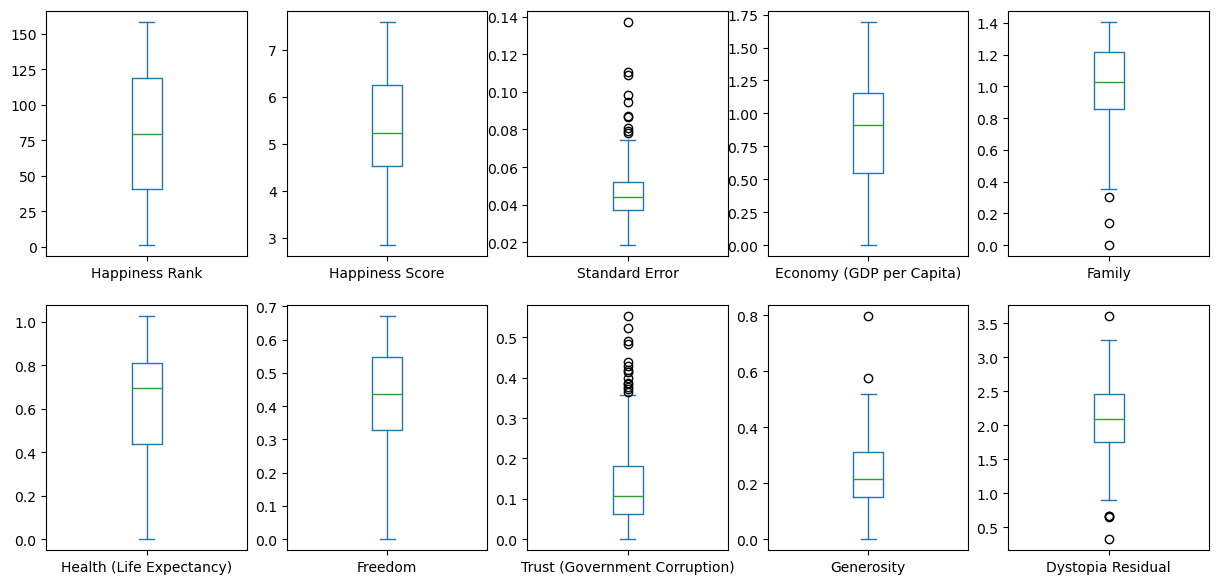

In [72]:
df.plot(kind='box',subplots=True,layout=(2,5))

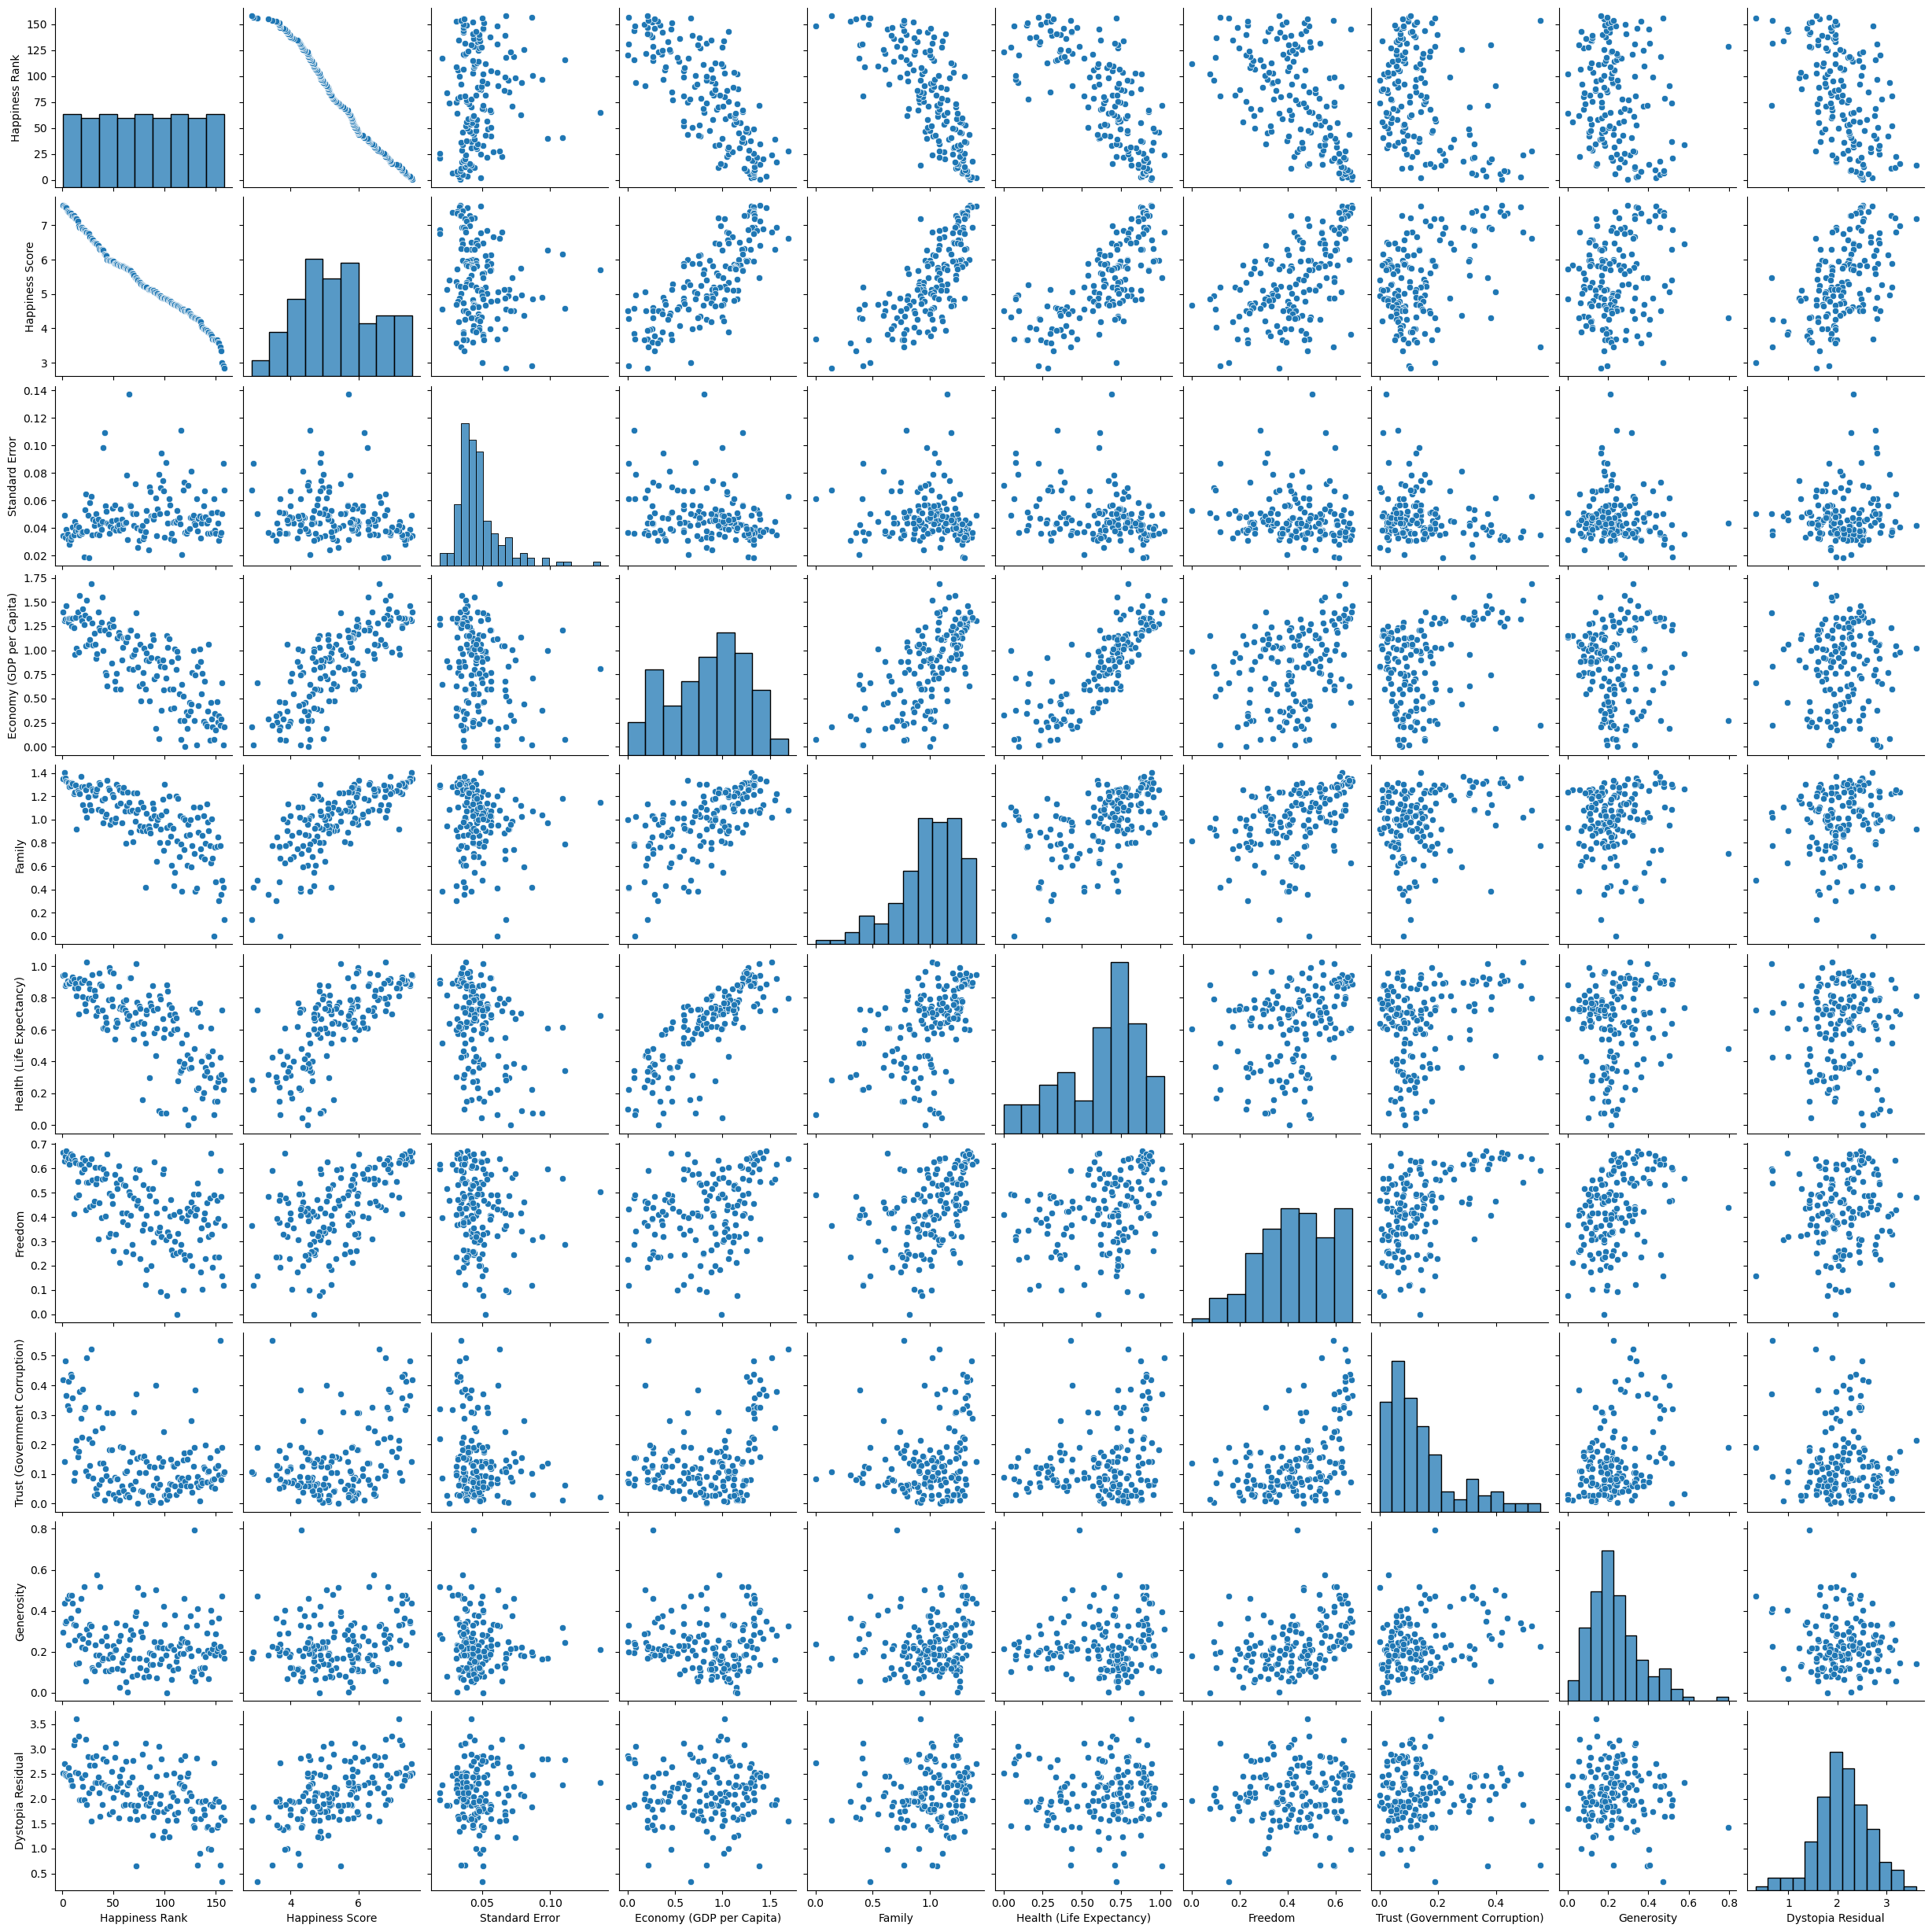

In [73]:
sns.pairplot(df)

In [74]:
corr=df.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

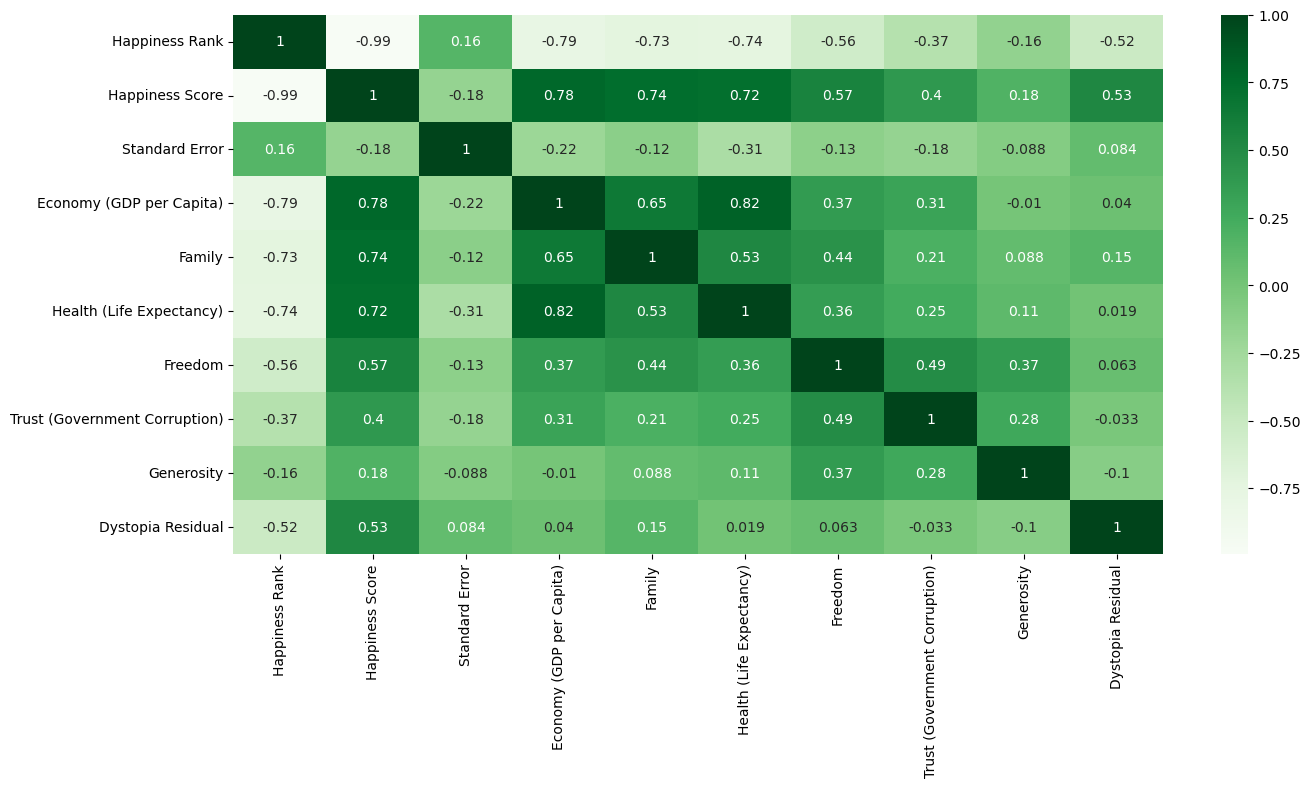

In [75]:
sns.heatmap(corr,cmap='Greens',annot=True)

KEY OBSERVATION

Correlation exists between -1 to +1

Darker shades indicates high coorelation with each other and lighter shades indicated least correlation.

Happiness rank is very negetively correlated with happiness score.

Economy(GDP per Capita), Fmily and Health (Life expectency) shows positive correlation with Happiness score

## Encoding categorical columns

In [76]:
df1=df.copy()

In [77]:
# FEATURE ENGINEERING
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [85]:
df1=df1.drop(['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'],axis=1)

KeyError: "['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] not found in axis"

In [86]:
df1

,Country,Region,Happiness Score
0,Switzerland,Western Europe,7.587
1,Iceland,Western Europe,7.561
2,Denmark,Western Europe,7.527
3,Norway,Western Europe,7.522
4,Canada,North America,7.427
...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465
154,Benin,Sub-Saharan Africa,3.340
155,Syria,Middle East and Northern Africa,3.006
156,Burundi,Sub-Saharan Africa,2.905


In [87]:
df1['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [88]:
df1['Country'].nunique()

158

In [89]:
df1['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [92]:
df1['Country'].nunique()

158

In [96]:
label_encoder = LabelEncoder()
label_encoder.fit(df1['Country'])
df1['Country_Encoded'] = label_encoder.transform(df1['Country'])

In [97]:
df1

,Country,Region,Happiness Score,Country_Encoded
0,Switzerland,Western Europe,7.587,135
1,Iceland,Western Europe,7.561,58
2,Denmark,Western Europe,7.527,37
3,Norway,Western Europe,7.522,105
4,Canada,North America,7.427,24
...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,118
154,Benin,Sub-Saharan Africa,3.340,13
155,Syria,Middle East and Northern Africa,3.006,136
156,Burundi,Sub-Saharan Africa,2.905,21


In [98]:
one_hot_encoded = pd.get_dummies(df1['Region'])
df1 = pd.concat([df1, one_hot_encoded], axis=1)
df1.drop('Region', axis=1, inplace=True)

In [99]:
df1

,Country,Happiness Score,Country_Encoded,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,7.587,135,0,0,0,0,0,0,0,0,0,1
1,Iceland,7.561,58,0,0,0,0,0,0,0,0,0,1
2,Denmark,7.527,37,0,0,0,0,0,0,0,0,0,1
3,Norway,7.522,105,0,0,0,0,0,0,0,0,0,1
4,Canada,7.427,24,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,118,0,0,0,0,0,0,0,0,1,0
154,Benin,3.340,13,0,0,0,0,0,0,0,0,1,0
155,Syria,3.006,136,0,0,0,0,1,0,0,0,0,0
156,Burundi,2.905,21,0,0,0,0,0,0,0,0,1,0


In [100]:
df1.drop('Country', axis=1, inplace=True)

In [101]:
df1

,Happiness Score,Country_Encoded,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,7.587,135,0,0,0,0,0,0,0,0,0,1
1,7.561,58,0,0,0,0,0,0,0,0,0,1
2,7.527,37,0,0,0,0,0,0,0,0,0,1
3,7.522,105,0,0,0,0,0,0,0,0,0,1
4,7.427,24,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.465,118,0,0,0,0,0,0,0,0,1,0
154,3.340,13,0,0,0,0,0,0,0,0,1,0
155,3.006,136,0,0,0,0,1,0,0,0,0,0
156,2.905,21,0,0,0,0,0,0,0,0,1,0


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Happiness Score                  158 non-null    float64
 1   Country_Encoded                  158 non-null    int32  
 2   Australia and New Zealand        158 non-null    uint8  
 3   Central and Eastern Europe       158 non-null    uint8  
 4   Eastern Asia                     158 non-null    uint8  
 5   Latin America and Caribbean      158 non-null    uint8  
 6   Middle East and Northern Africa  158 non-null    uint8  
 7   North America                    158 non-null    uint8  
 8   Southeastern Asia                158 non-null    uint8  
 9   Southern Asia                    158 non-null    uint8  
 10  Sub-Saharan Africa               158 non-null    uint8  
 11  Western Europe                   158 non-null    uint8  
dtypes: float64(1), int32(1

We have converted the string values into numerical values

## Plotting Outliers

In [103]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x226257e3c40>,
 'caps': [<matplotlib.lines.Line2D at 0x226257ef220>,
 'boxes': [<matplotlib.lines.Line2D at 0x226257e3970>],
 'medians': [<matplotlib.lines.Line2D at 0x226257ef730>],
 'fliers': [<matplotlib.lines.Line2D at 0x226257efa00>],
 'means': []}

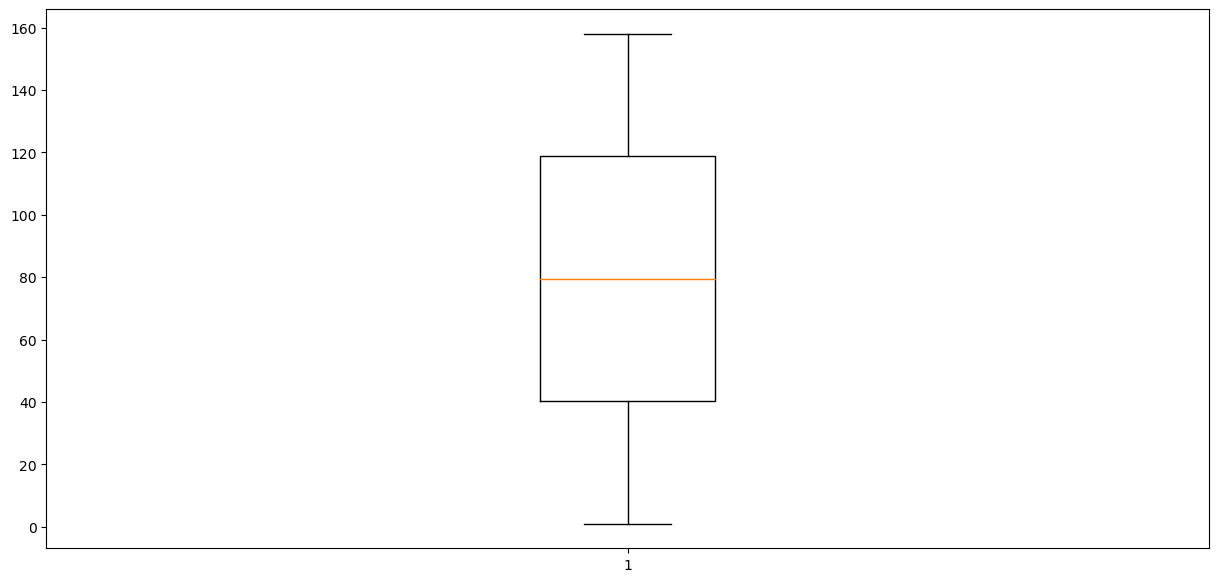

In [104]:
plt.boxplot(df['Happiness Rank'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2262584f790>,
 'caps': [<matplotlib.lines.Line2D at 0x2262584fd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2262584f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2262585b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2262585b5e0>],
 'means': []}

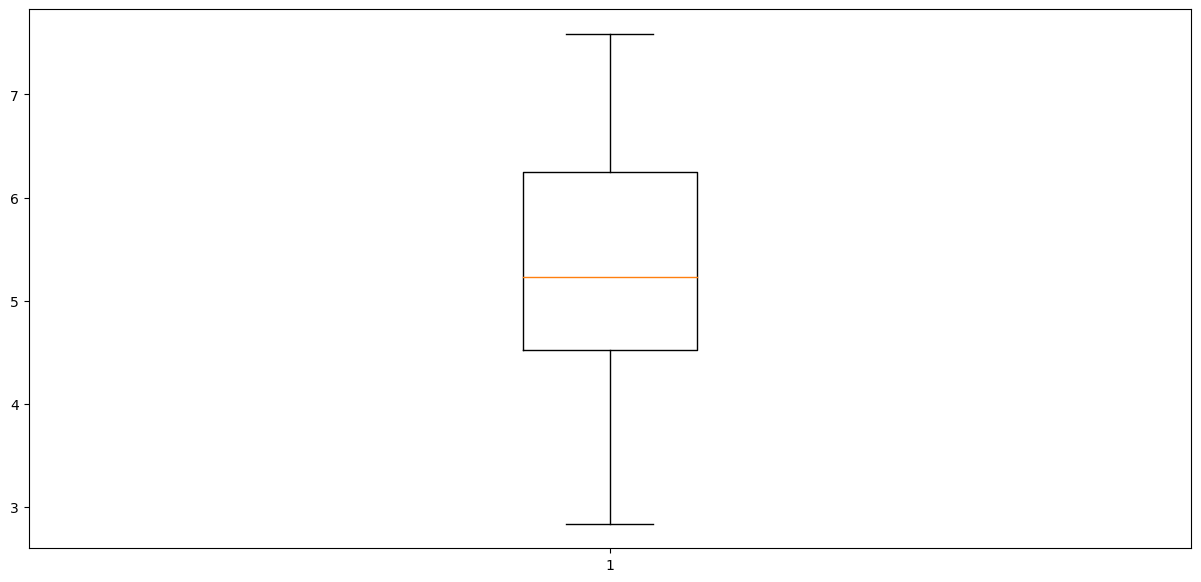

In [105]:
plt.boxplot(df['Happiness Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226258aa5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x226258aab80>,
 'boxes': [<matplotlib.lines.Line2D at 0x226258aa3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x226258ba160>],
 'fliers': [<matplotlib.lines.Line2D at 0x226258ba430>],
 'means': []}

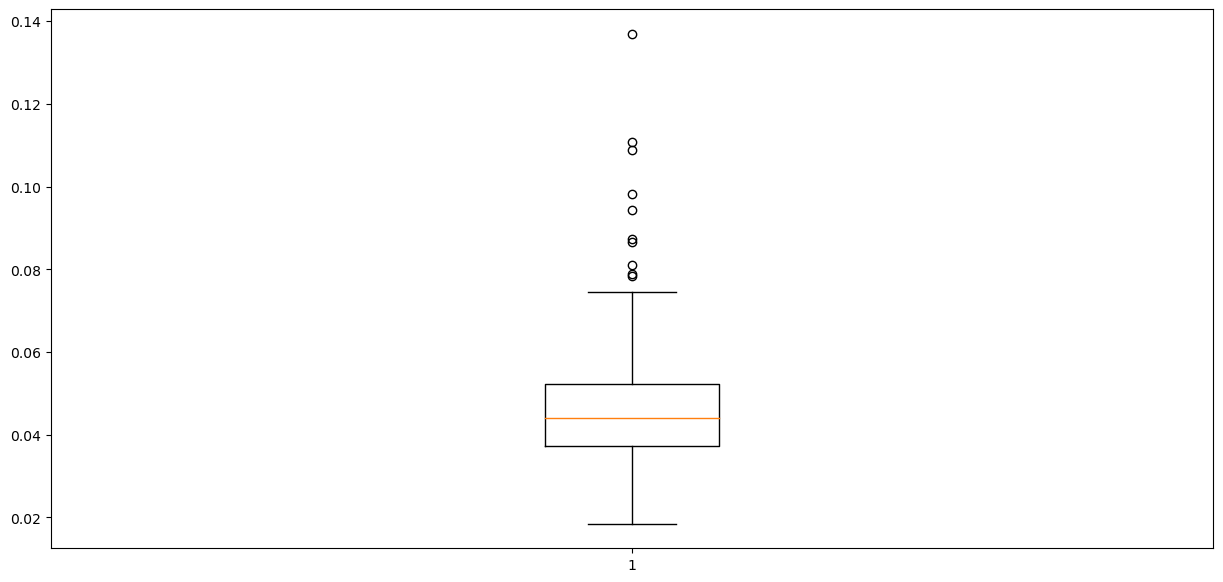

In [106]:
plt.boxplot(df['Standard Error'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2262590ba30>,
 'caps': [<matplotlib.lines.Line2D at 0x2262590bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2262590b880>],
 'medians': [<matplotlib.lines.Line2D at 0x226259185b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226259188b0>],
 'means': []}

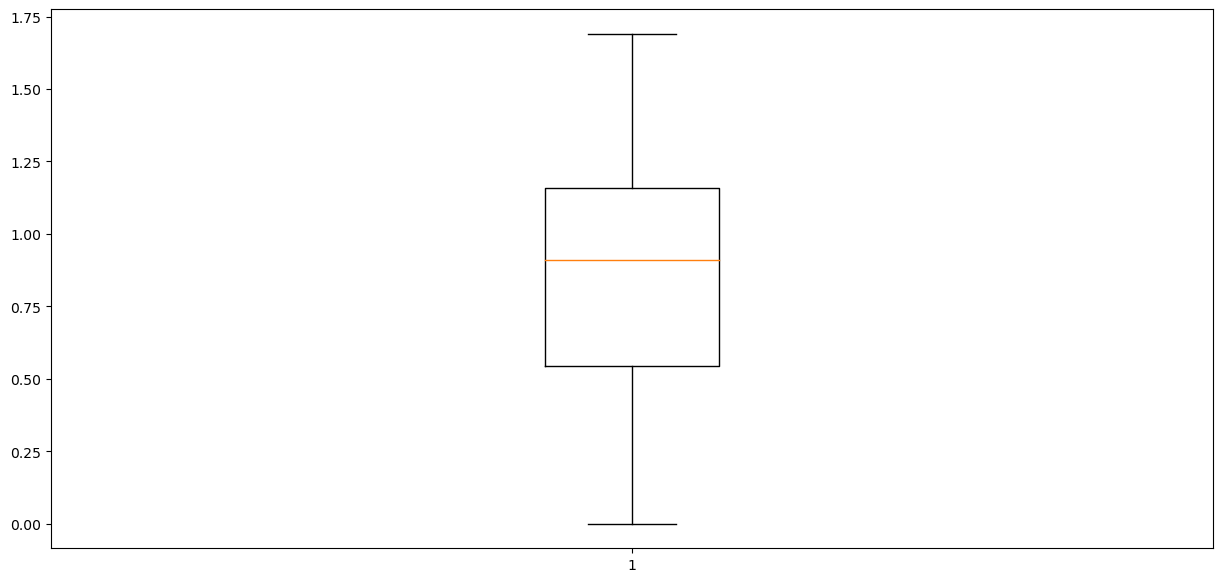

In [107]:
plt.boxplot(df['Economy (GDP per Capita)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22625e82760>,
 'caps': [<matplotlib.lines.Line2D at 0x22625e82d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x22625e825b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22625e912e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22625e915b0>],
 'means': []}

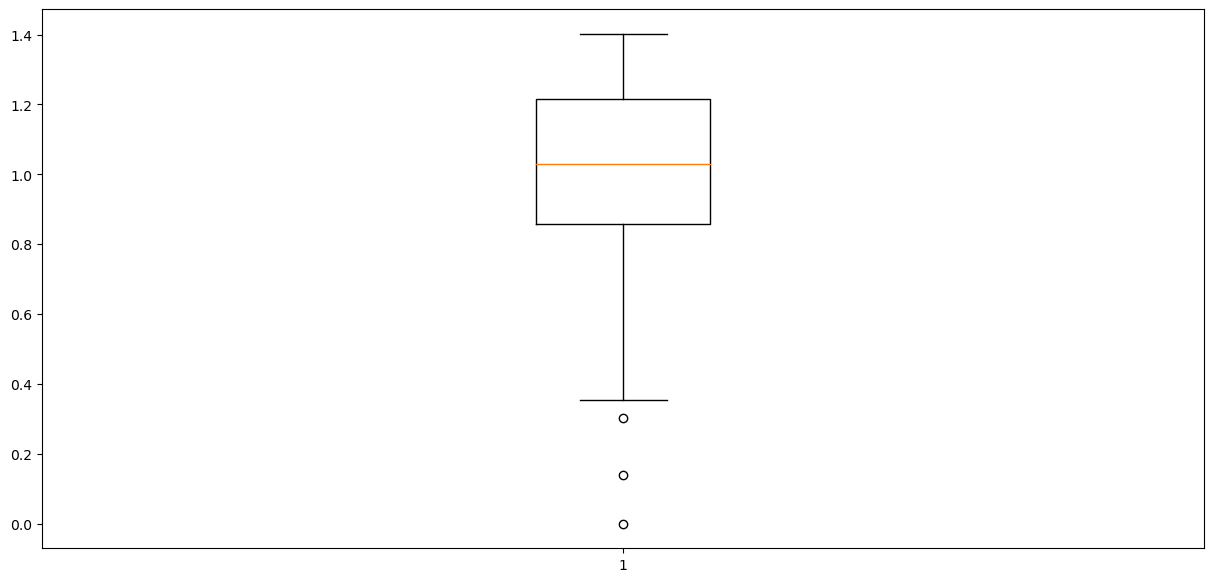

In [108]:
plt.boxplot(df['Family'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226261b7610>,
 'caps': [<matplotlib.lines.Line2D at 0x226261b7bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226261ab1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x226261c5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x226261c5460>],
 'means': []}

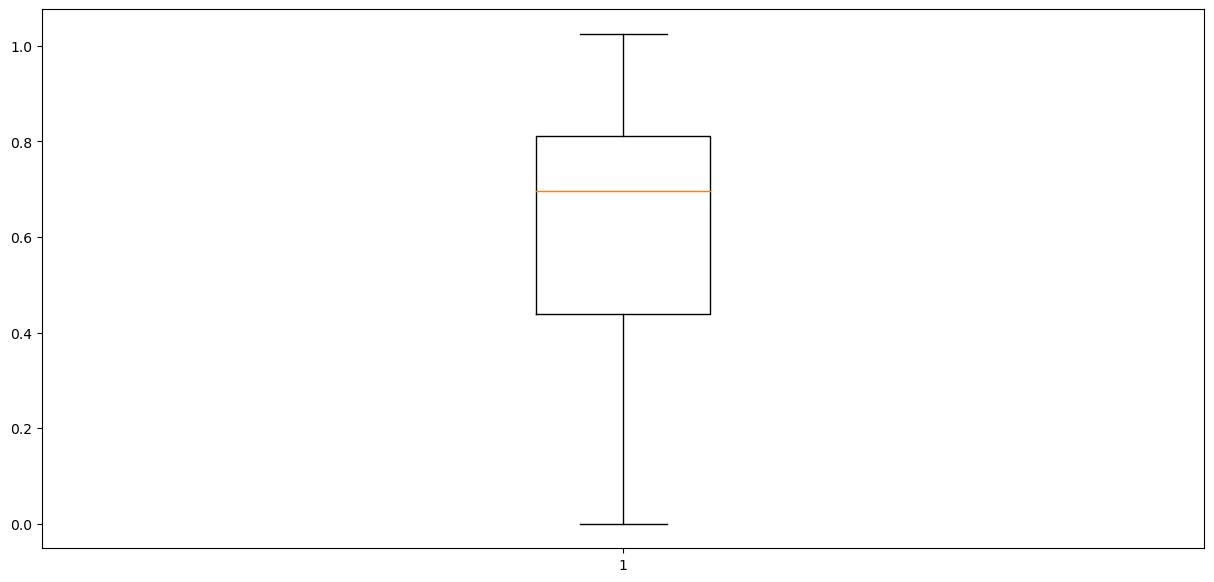

In [109]:
plt.boxplot(df['Health (Life Expectancy)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2262621a640>,
 'caps': [<matplotlib.lines.Line2D at 0x2262621abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2262620f190>],
 'medians': [<matplotlib.lines.Line2D at 0x226262291c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22626229490>],
 'means': []}

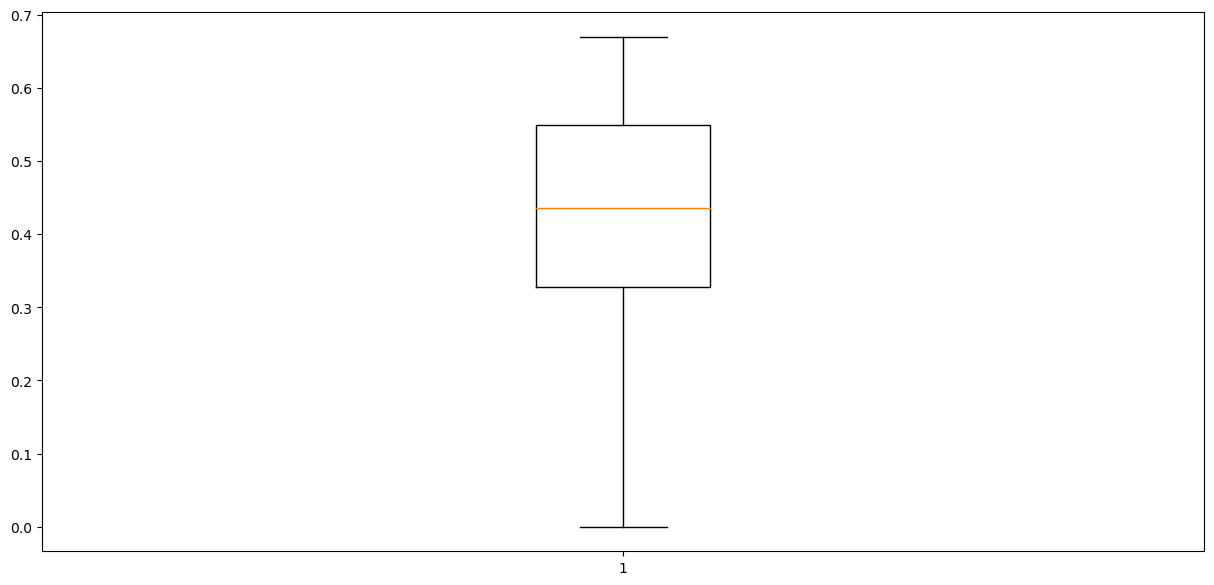

In [110]:
plt.boxplot(df['Freedom'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226262813a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22626281940>,
 'boxes': [<matplotlib.lines.Line2D at 0x22626281250>],
 'medians': [<matplotlib.lines.Line2D at 0x22626281ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2262628e1f0>],
 'means': []}

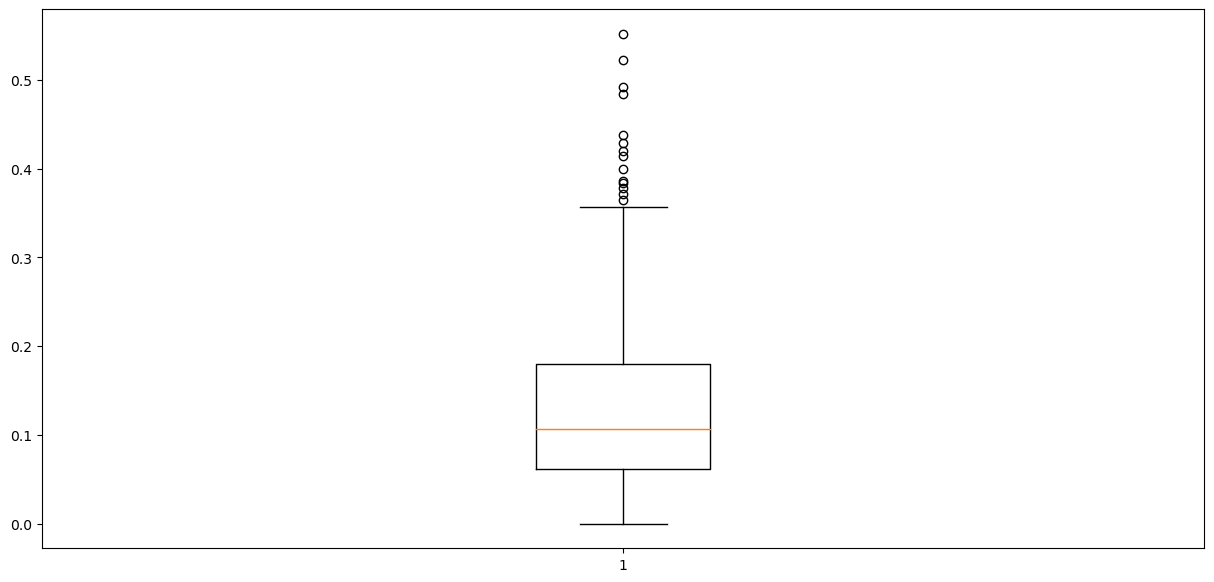

In [111]:
plt.boxplot(df['Trust (Government Corruption)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22628350460>,
 'caps': [<matplotlib.lines.Line2D at 0x22628350a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x226283501f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22628350fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2262835e2b0>],
 'means': []}

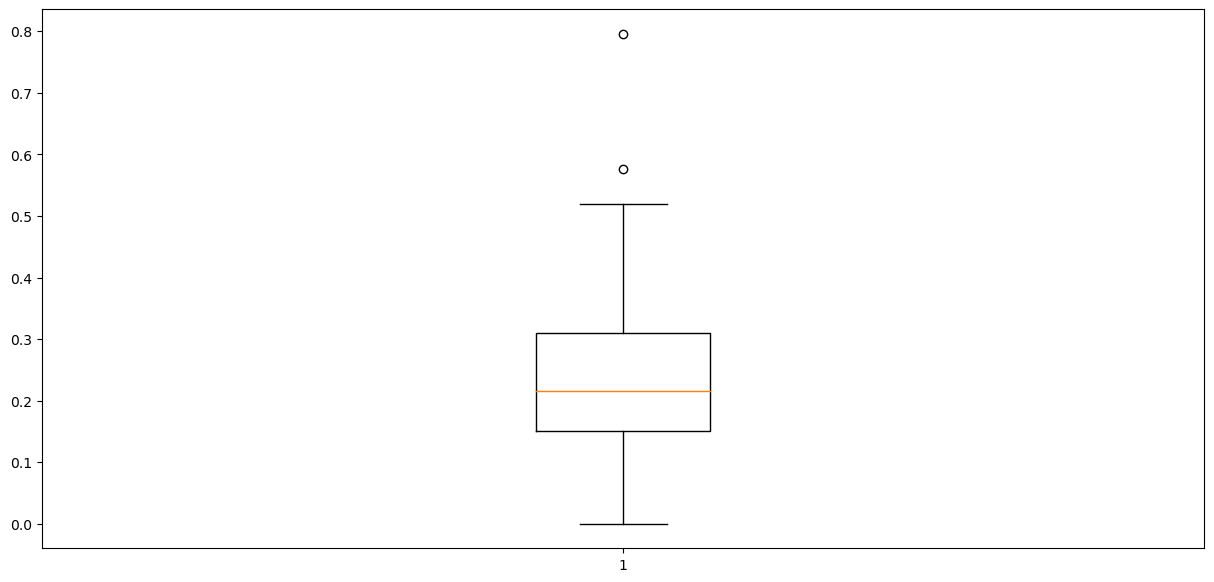

In [112]:
plt.boxplot(df['Generosity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226283b9760>,
 'caps': [<matplotlib.lines.Line2D at 0x226283b9d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x226283b94f0>],
 'medians': [<matplotlib.lines.Line2D at 0x226283c52e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226283c55b0>],
 'means': []}

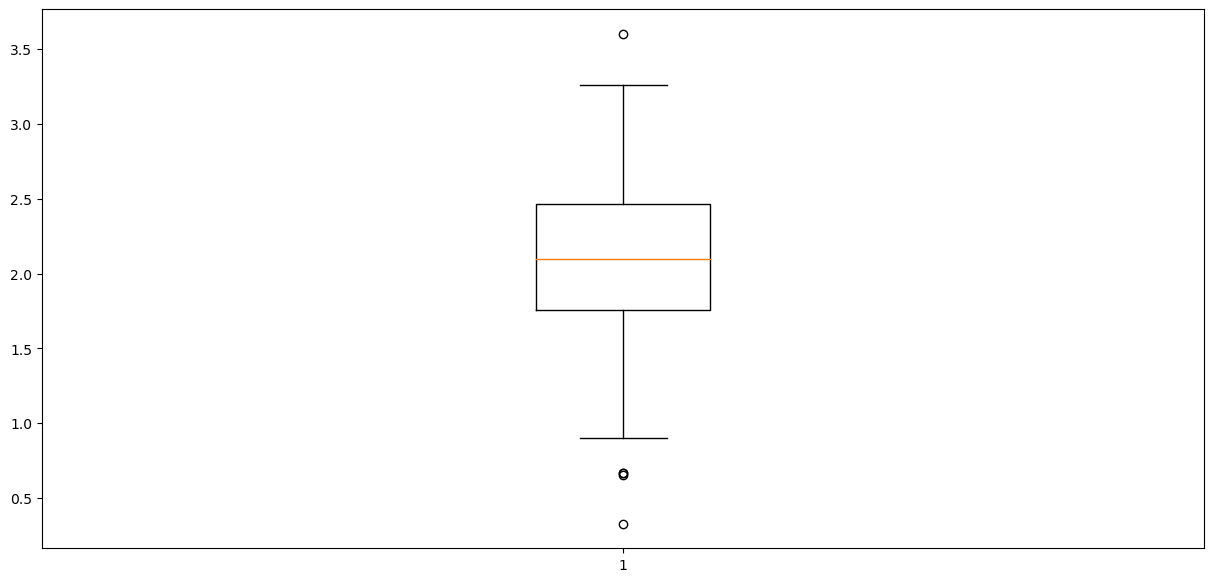

In [113]:
plt.boxplot(df['Dystopia Residual'])

## Data Cleaning

### Removing Outliers

In [116]:
#removing outliers by Z-score method
z=np.abs(zscore(df['Standard Error']))
z

0      0.805926
1      0.055889
2      0.854487
3      0.531526
4      0.722845
         ...   
153    0.774917
154    0.662582
155    0.132534
156    2.263962
157    1.134182
Name: Standard Error, Length: 158, dtype: float64

In [117]:
df.shape

(158, 12)

In [118]:
z=np.abs(zscore(df['Family']))
z

0      1.320281
1      1.514458
2      1.361054
3      1.251922
4      1.221204
         ...   
153    0.800520
154    2.346860
155    1.901086
156    2.118467
157    3.134725
Name: Family, Length: 158, dtype: float64

In [119]:
z=np.abs(zscore(df['Trust (Government Corruption)']))
z

0      2.309652
1      0.016480
2      2.842774
3      1.852081
4      1.555725
         ...   
153    3.413922
154    0.529210
155    0.381419
156    0.357715
157    0.301803
Name: Trust (Government Corruption), Length: 158, dtype: float64

In [120]:
z=np.abs(zscore(df['Generosity']))
z

0      0.471040
1      1.575856
2      0.824293
3      0.868638
4      1.748563
         ...   
153    0.087228
154    0.433117
155    1.856891
156    0.316950
157    0.558153
Name: Generosity, Length: 158, dtype: float64

In [121]:
z=np.abs(zscore(df['Dystopia Residual']))
z

0      0.758258
1      1.092857
2      0.712335
3      0.663893
4      0.639337
         ...   
153    2.588925
154    0.843967
155    3.208430
156    0.481985
157    0.963612
Name: Dystopia Residual, Length: 158, dtype: float64

In [122]:
df.shape

(158, 12)

In [123]:
threshold=3
print(np.where(z>3))

(array([155], dtype=int64),)


In [124]:
df_new=df[(z<3)]

In [125]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [126]:
df_new.shape

(157, 12)

so after removing zscore only 1 row is deleted as an outliers from 158 rows

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

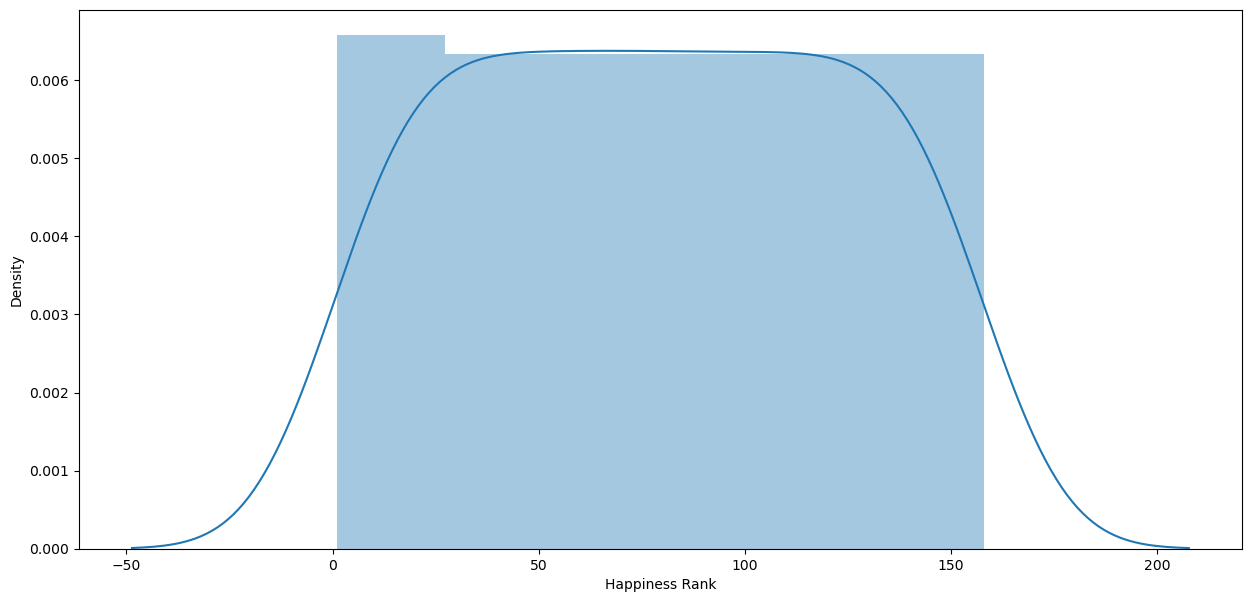

In [133]:
sns.distplot(df_new['Happiness Rank'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

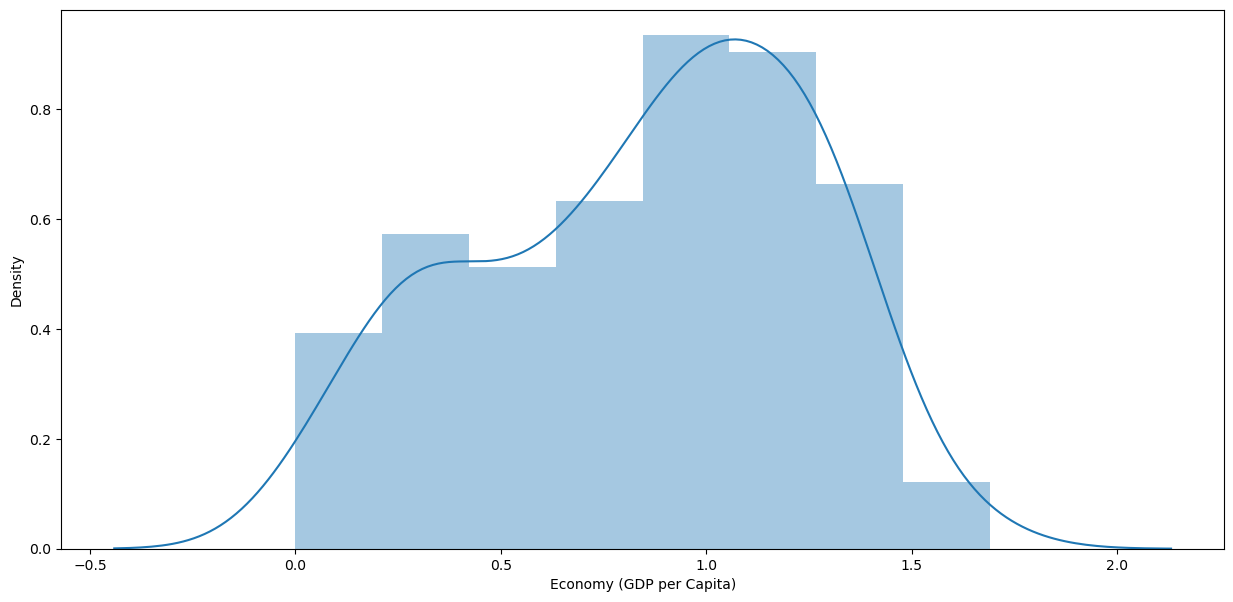

In [134]:
sns.distplot(df_new['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

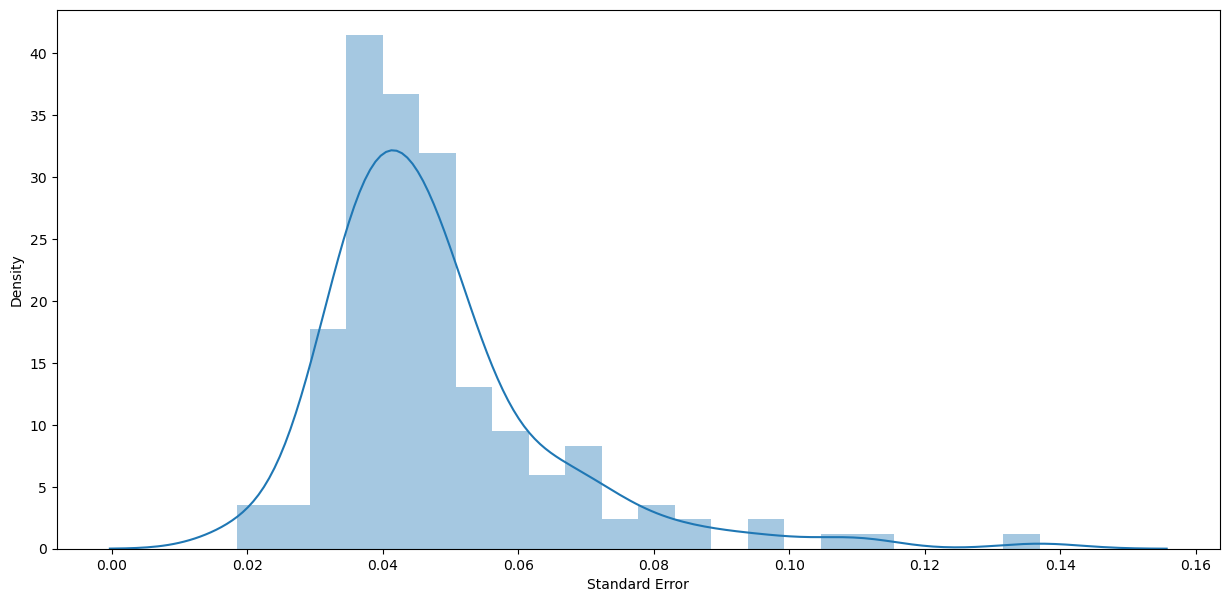

In [130]:
sns.distplot(df_new['Standard Error'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

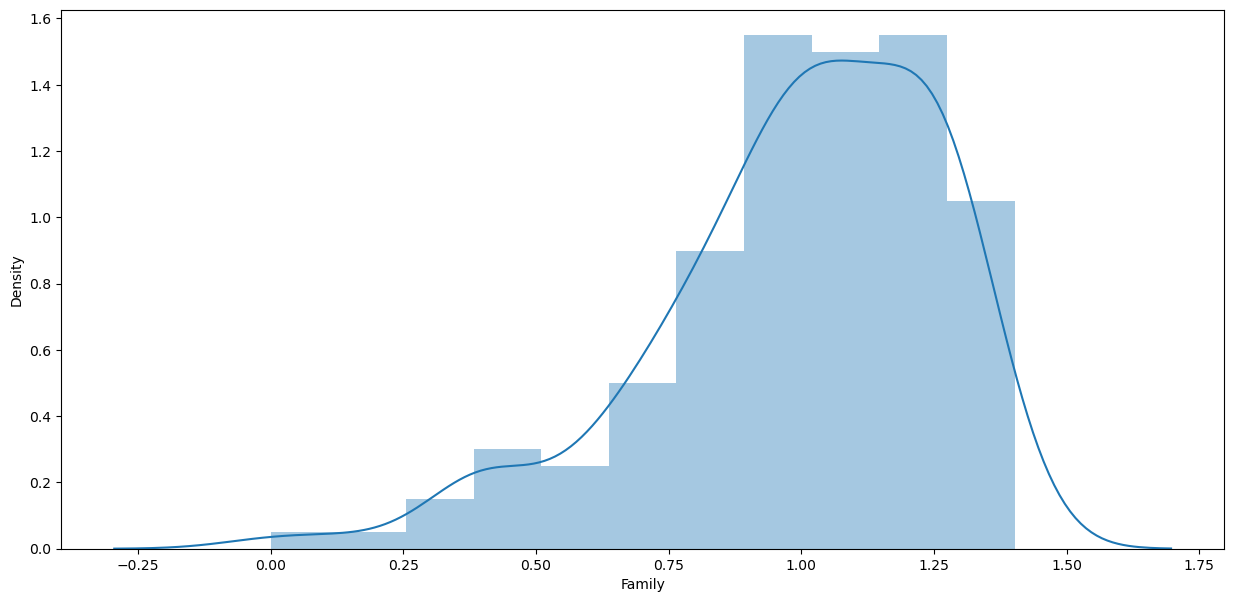

In [132]:
sns.distplot(df_new['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

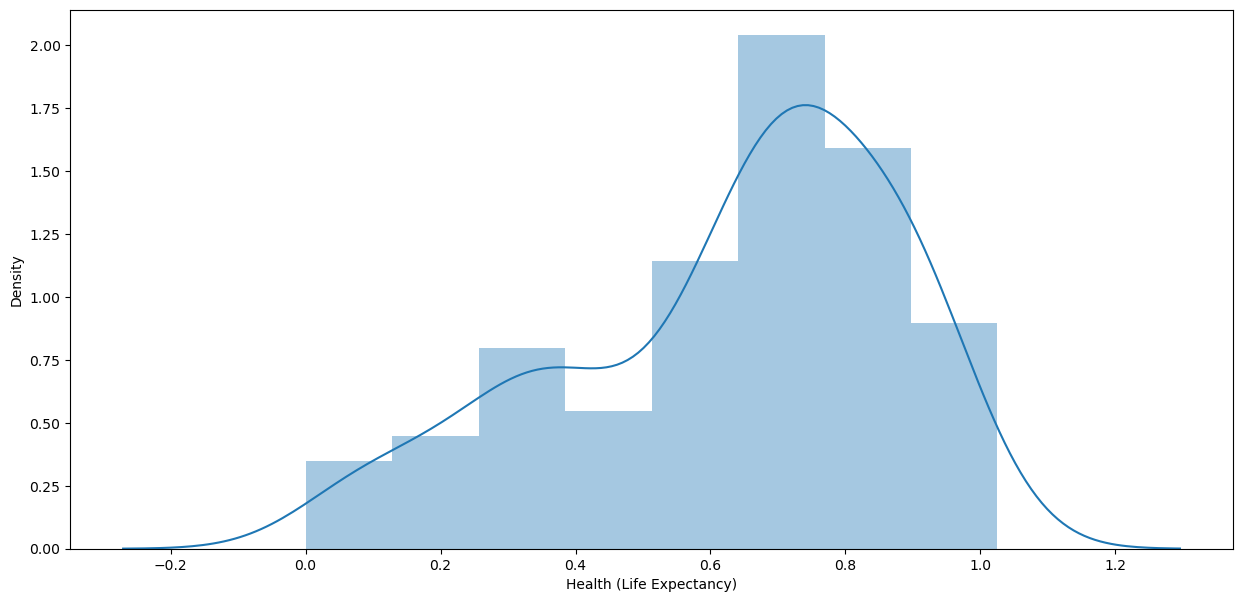

In [135]:
sns.distplot(df_new['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

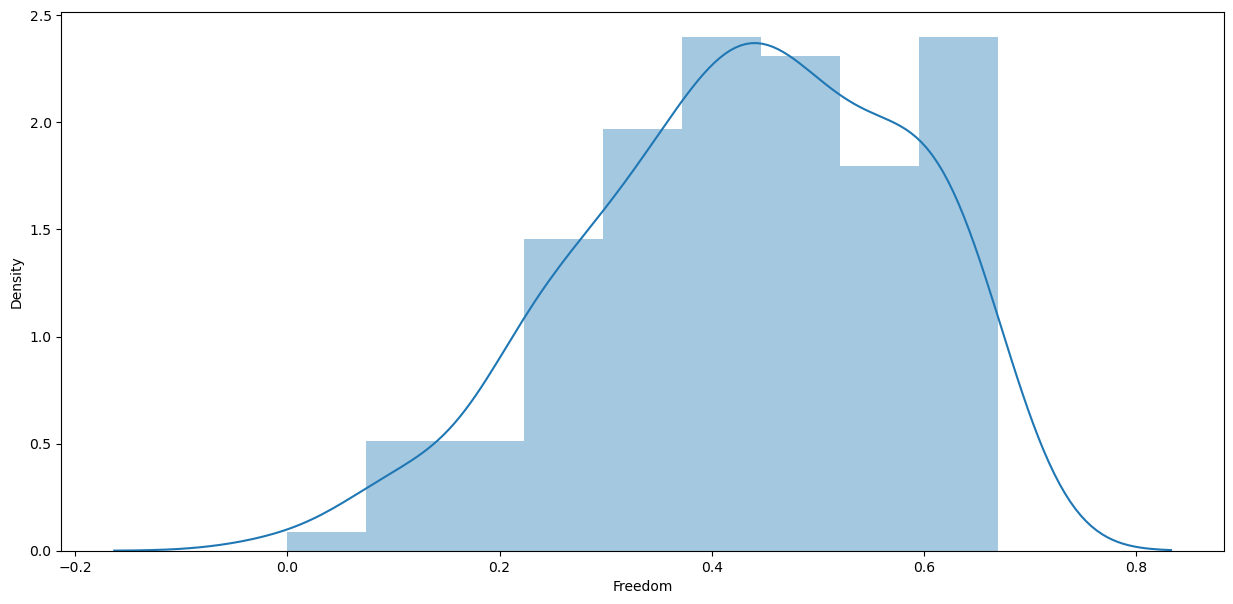

In [136]:
sns.distplot(df_new['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

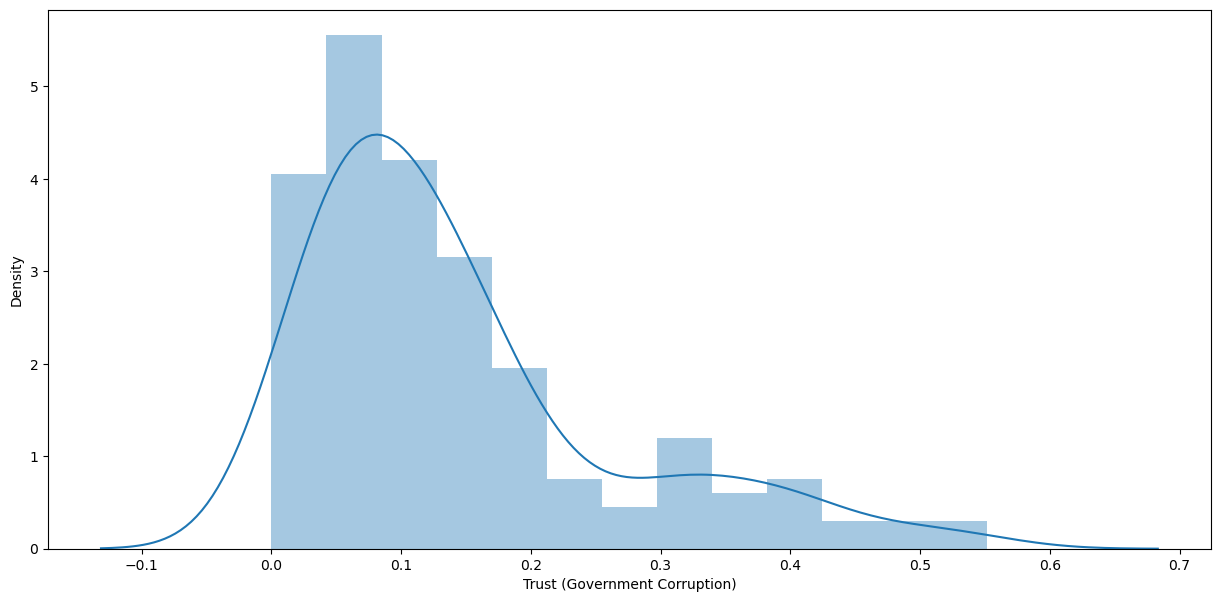

In [137]:
sns.distplot(df_new['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

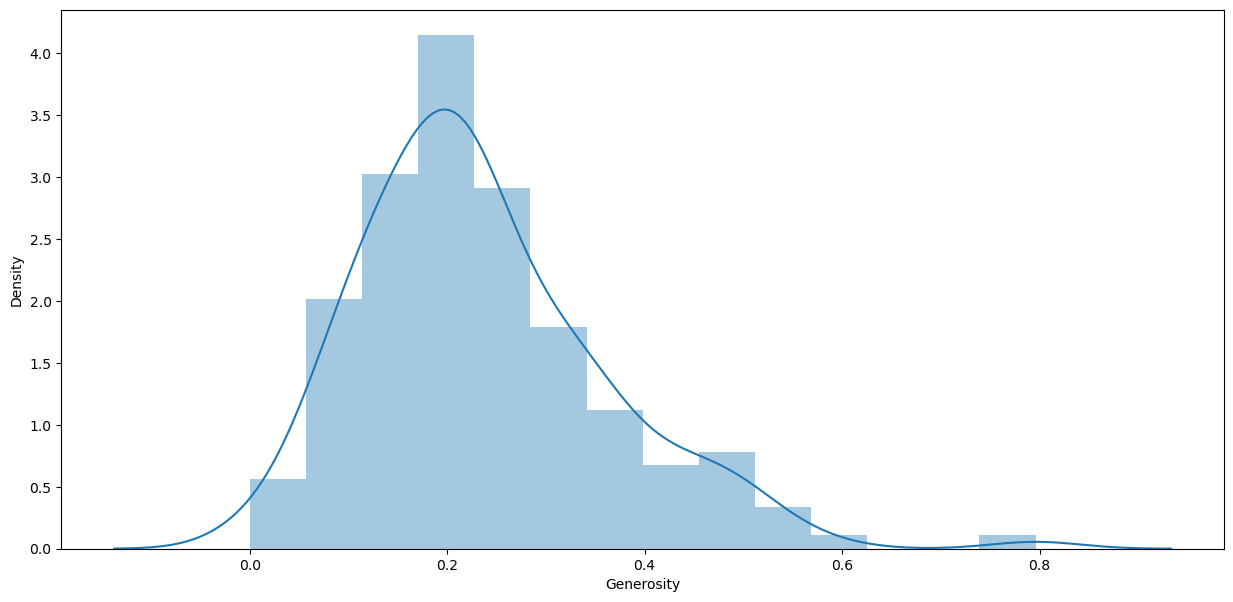

In [139]:
sns.distplot(df_new['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

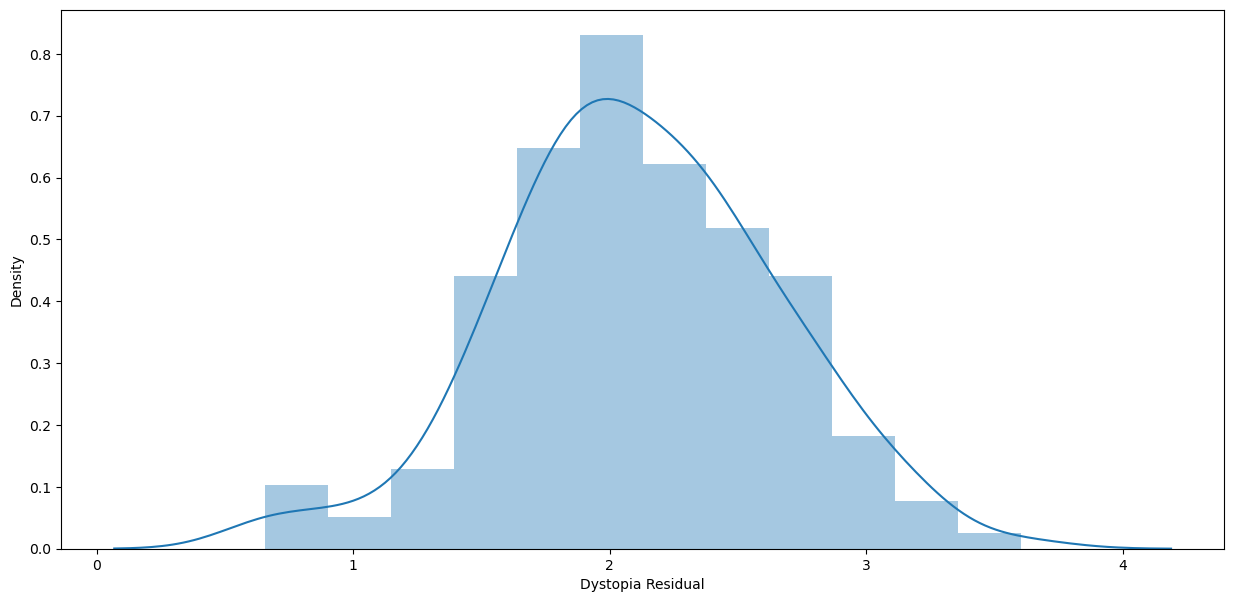

In [140]:
sns.distplot(df_new['Dystopia Residual'])

From the above distribution plots we notice that almost all columns have some are skewness in them.

## Visualizing the correlation between label and features using bar plot

Text(0, 0.5, 'Target')

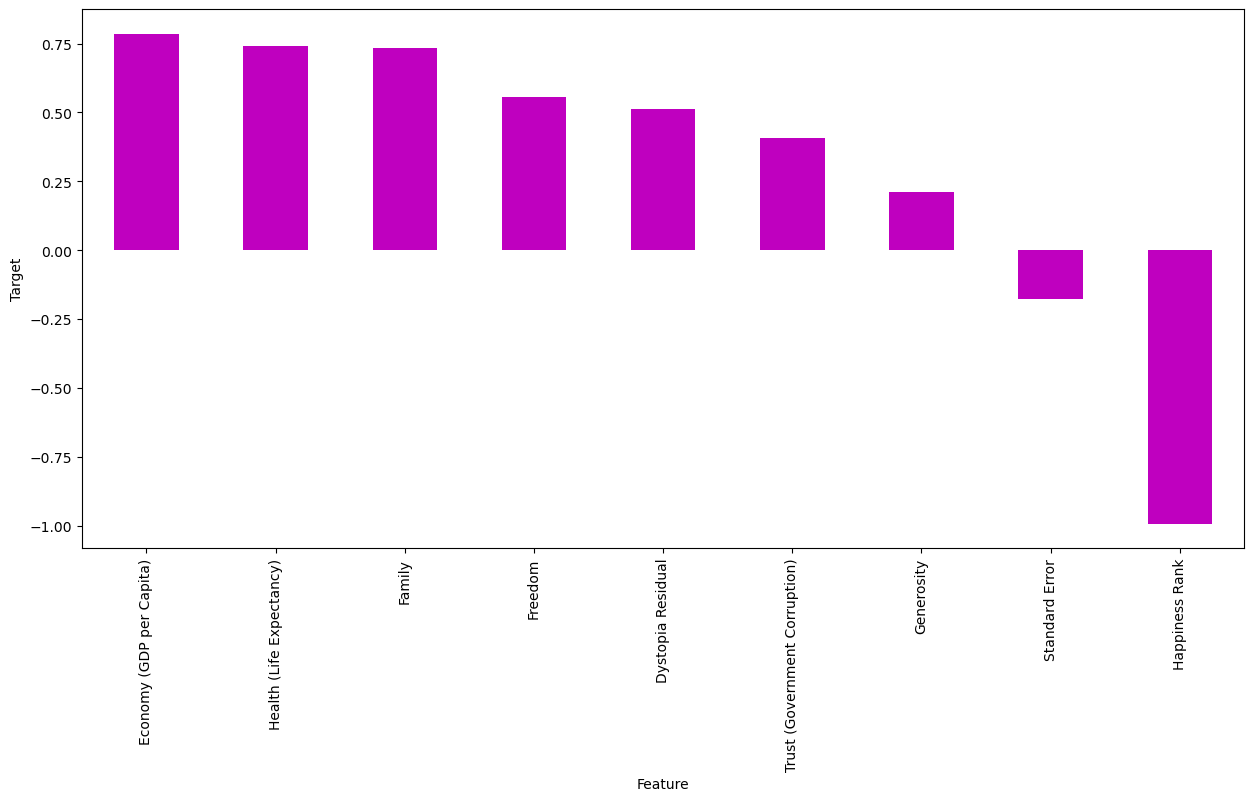

In [141]:
df_new.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature')
plt.ylabel('Target')

## Checking for skewness


 mu = 5.39 and sigma = 1.13



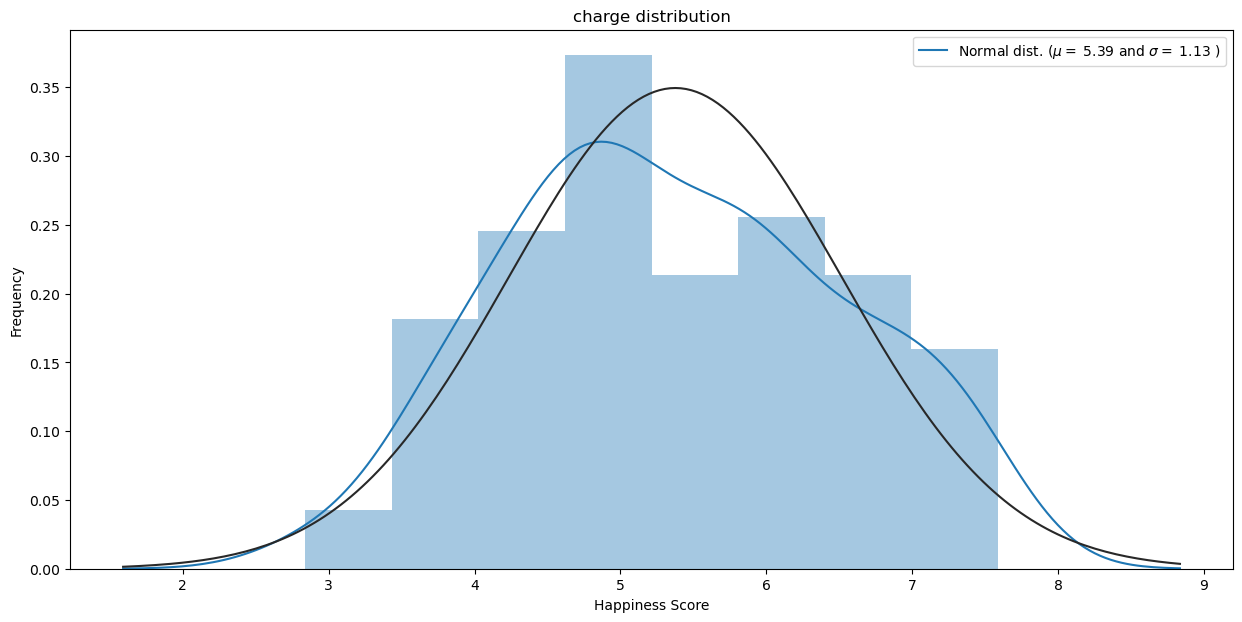

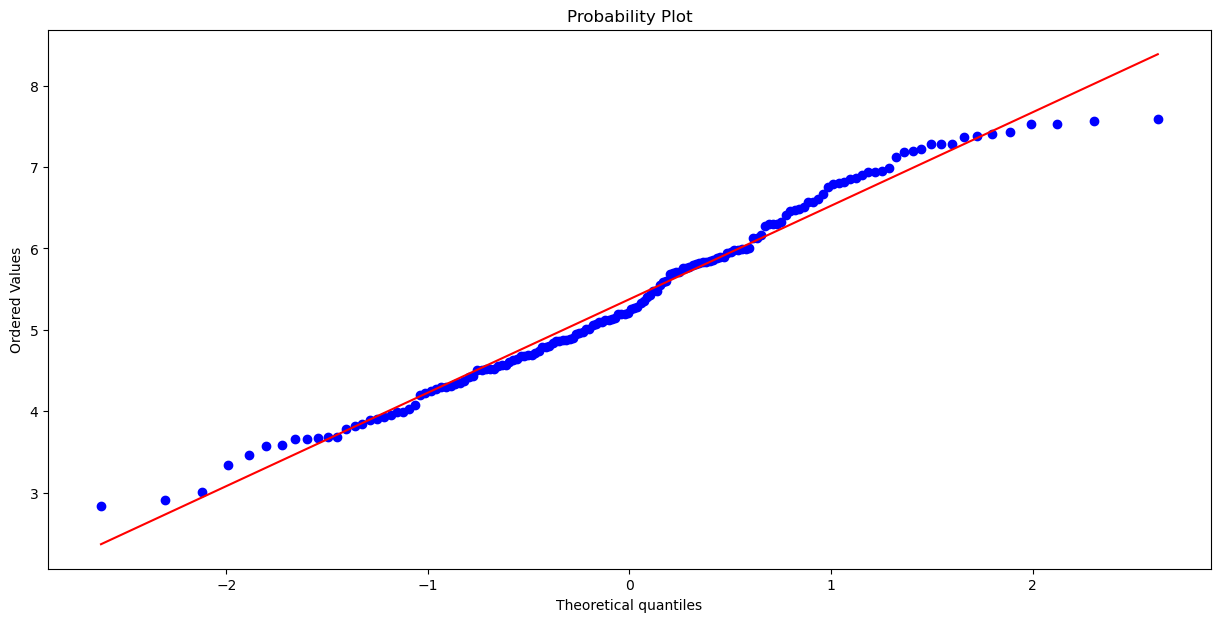

In [143]:
#bydefault the acceptable skewness is -0.5 to +0.5
#Skewness of dependent variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['Happiness Score'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_new['Happiness Score'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('charge distribution')

fig = plt.figure()
res = stats.probplot(df['Happiness Score'], plot=plt)
plt.show()

In [158]:
df_corr=df_new.corr()
df_corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992452,0.194617,-0.788012,-0.728242,-0.746637,-0.548183,-0.379985,-0.183644,-0.509124
Happiness Score,-0.992452,1.000000,-0.214358,0.786327,0.733991,0.739668,0.557760,0.406041,0.210066,0.511954
Standard Error,0.194617,-0.214358,1.000000,-0.219459,-0.130069,-0.316825,-0.180760,-0.188930,-0.143302,0.050814
Economy (GDP per Capita),-0.788012,0.786327,-0.219459,1.000000,0.647708,0.818459,0.369163,0.309339,-0.005141,0.031837
Family,-0.728242,0.733991,-0.130069,0.647708,1.000000,0.542123,0.429021,0.212785,0.112529,0.114359
Health (Life Expectancy),-0.746637,0.739668,-0.316825,0.818459,0.542123,1.000000,0.368791,0.247654,0.105140,0.027515
Freedom,-0.548183,0.557760,-0.180760,0.369163,0.429021,0.368791,1.000000,0.503425,0.403962,0.026983
Trust (Government Corruption),-0.379985,0.406041,-0.188930,0.309339,0.212785,0.247654,0.503425,1.000000,0.274771,-0.026195
Generosity,-0.183644,0.210066,-0.143302,-0.005141,0.112529,0.105140,0.403962,0.274771,1.000000,-0.066271
Dystopia Residual,-0.509124,0.511954,0.050814,0.031837,0.114359,0.027515,0.026983,-0.026195,-0.066271,1.000000


<AxesSubplot:>

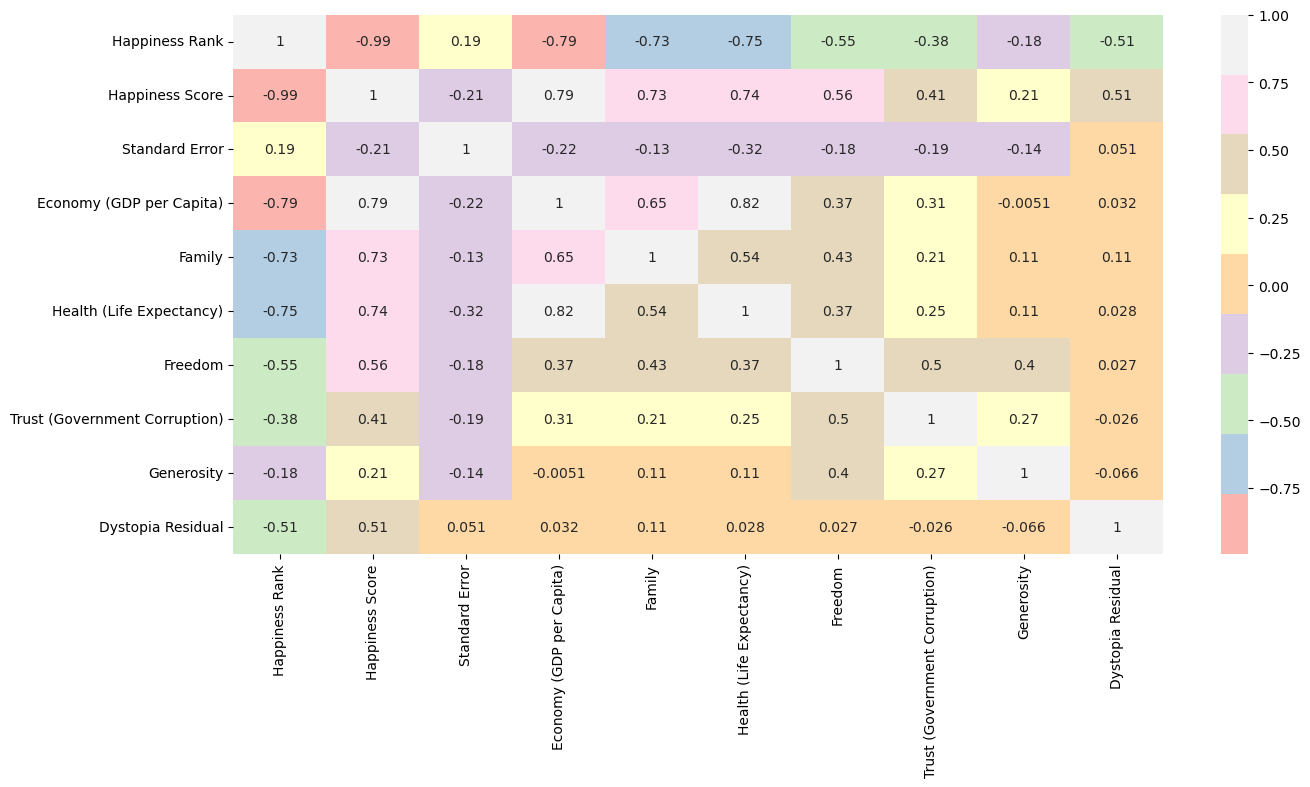

In [161]:
sns.heatmap(df_corr,cmap='Pastel1',annot=True)

In [162]:
df_new.skew()

Happiness Rank                   0.002090
Happiness Score                  0.120571
Standard Error                  -0.048091
Economy (GDP per Capita)        -0.325374
Family                          -1.031116
Health (Life Expectancy)        -0.697235
Freedom                         -0.421640
Trust (Government Corruption)    1.390063
Generosity                       1.026624
Dystopia Residual               -0.094596
dtype: float64

## Removing Skewness

Before removing skewness:-


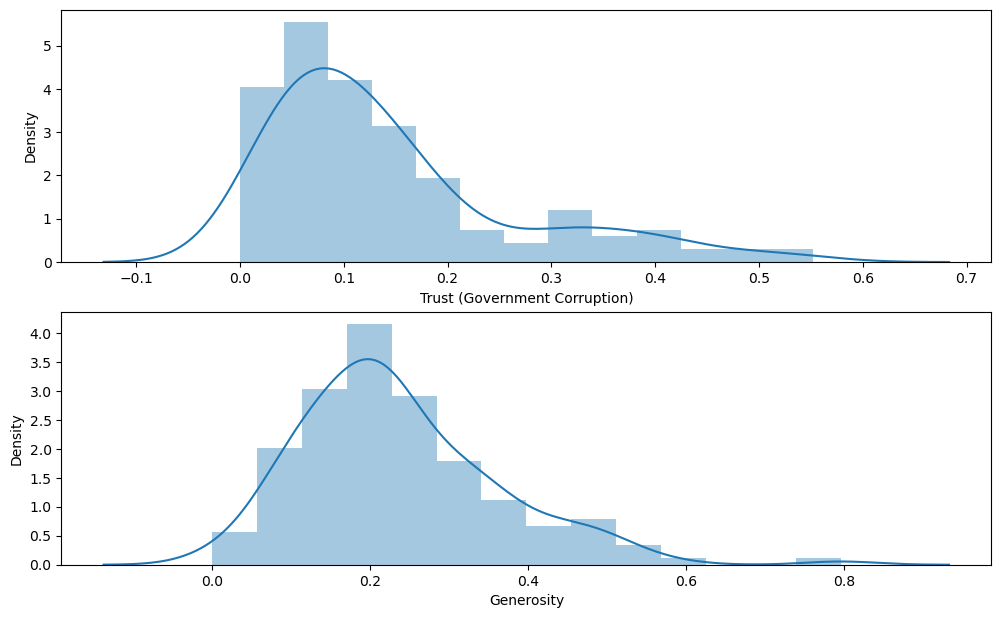

In [164]:
skewed=['Trust (Government Corruption)', 'Generosity']
print('Before removing skewness:-')
plt.figure(figsize=(12,19))
for i in enumerate(skewed):
    plt.subplot(5,1,i[0]+1)
    sns.distplot(df_new[i[1]])
plt.show()

In [171]:
df_new[['Trust (Government Corruption)','Generosity']]=np.sqrt(df_new[['Trust (Government Corruption)', 'Generosity']])

After removing skewness:-


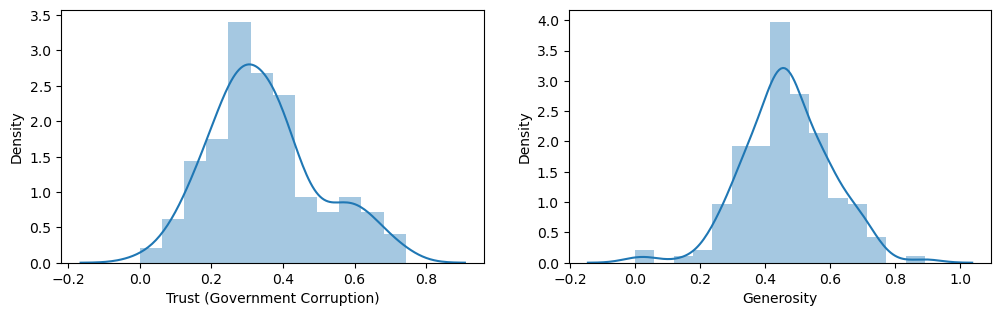

In [172]:
print('After removing skewness:-')
plt.figure(figsize=(12,19))
for i in enumerate(skewed):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df_new[i[1]])
plt.show()

In [147]:
#lets find the best method for skewness
from scipy.stats import skew, boxcox
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        df_new=m
        print(skew(m))
        print('\n')

In [148]:
skee(df_new['Standard Error'])

original skewness is: 1.9801401607976032


1.215183550334141


0.484722642219083


-0.04763031434366424




In [149]:
df_new['Standard Error']=stats.boxcox(df_new['Standard Error'])[0]

In [173]:
df_new.skew()

Happiness Rank                   0.002090
Happiness Score                  0.120571
Standard Error                  -0.048091
Economy (GDP per Capita)        -0.325374
Family                          -1.031116
Health (Life Expectancy)        -0.697235
Freedom                         -0.421640
Trust (Government Corruption)    0.517633
Generosity                      -0.130945
Dystopia Residual               -0.094596
dtype: float64

so we can see that the skewness has been removed from the selected columns.

## Dividing data into x and y

In [194]:
df_new.drop('Country',axis=1,inplace=True)

In [195]:
df_new.drop('Region',axis=1,inplace=True)

In [196]:
df_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,-6.458038,1.39651,1.34951,0.94143,0.66557,0.647904,0.544775,2.51738
1,2,7.561,-5.359011,1.30232,1.40223,0.94784,0.62877,0.376098,0.660530,2.70201
2,3,7.527,-6.538638,1.32548,1.36058,0.87464,0.64938,0.695392,0.584286,2.49204
3,4,7.522,-6.047643,1.45900,1.33095,0.88521,0.66973,0.604177,0.589059,2.46531
4,5,7.427,-6.326104,1.32629,1.32261,0.90563,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...,...
152,153,3.575,-6.792209,0.31982,0.30285,0.30335,0.23414,0.311753,0.604235,1.95210
153,154,3.465,-6.407942,0.22208,0.77370,0.42864,0.59201,0.742906,0.475689,0.67042
154,155,3.340,-6.234779,0.28665,0.35386,0.31910,0.48450,0.283019,0.427317,1.63328
156,157,2.905,-3.868014,0.01530,0.41587,0.22396,0.11850,0.317207,0.444151,1.83302


In [197]:
x= df_new.drop('Happiness Score', axis=1)
y= df_new['Happiness Score']

In [198]:
print(x)
x.shape

     Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  \
0                 1       -6.458038                   1.39651  1.34951   
1                 2       -5.359011                   1.30232  1.40223   
2                 3       -6.538638                   1.32548  1.36058   
3                 4       -6.047643                   1.45900  1.33095   
4                 5       -6.326104                   1.32629  1.32261   
..              ...             ...                       ...      ...   
152             153       -6.792209                   0.31982  0.30285   
153             154       -6.407942                   0.22208  0.77370   
154             155       -6.234779                   0.28665  0.35386   
156             157       -3.868014                   0.01530  0.41587   
157             158       -4.488608                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557

(157, 9)

In [199]:
print(y)
y.shape

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
152    3.575
153    3.465
154    3.340
156    2.905
157    2.839
Name: Happiness Score, Length: 157, dtype: float64


(157,)

## Model Building

## Spliting the data for training and testing

In [200]:
# splitting the data into 76% training and 24% testing
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.24, random_state=43)

In [201]:
x_train.shape

(119, 9)

In [202]:
y_train.shape

(119,)

In [203]:
x_test.shape

(38, 9)

In [204]:
y_test.shape

(38,)

here split the data for testing and training

## Linear Regression

In [205]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [206]:
LR.coef_

array([-0.00194261, -0.00854614,  0.95204098,  0.93419908,  0.91353908,
        0.90203644,  0.6773995 ,  0.93767687,  0.91596785])

In [207]:
LR.score(x_train,y_train)

0.9987717548006119

In [208]:
LR_predict=LR.predict(x_test)

In [209]:
print(LR_predict)

[3.88570709 5.22891416 4.86288306 7.55065938 5.5604804  5.91960254
 3.98445047 5.78589387 6.89498628 5.71634127 7.30323438 4.52053256
 3.81215372 4.59886494 4.78745992 7.46056762 7.24406229 4.62613408
 7.00321206 7.23238474 4.18851651 4.97683652 5.30570727 6.03033869
 6.33450319 5.45004667 7.56509806 6.48991326 4.038613   3.94317266
 5.22746391 5.83976785 6.94367931 6.28653091 5.59935136 6.35516234
 4.4997833  4.60992191]


In [210]:
print(y_test)

142    3.896
80     5.194
98     4.876
0      7.587
69     5.548
50     5.890
138    3.989
62     5.754
19     6.901
66     5.689
10     7.278
119    4.517
144    3.819
116    4.565
103    4.800
2      7.527
11     7.226
113    4.633
15     6.983
12     7.200
129    4.297
93     4.971
76     5.286
45     5.987
38     6.295
72     5.429
1      7.561
30     6.505
136    4.033
140    3.931
79     5.212
57     5.824
17     6.940
39     6.269
67     5.605
37     6.298
122    4.507
101    4.857
Name: Happiness Score, dtype: float64


In [212]:
#checking the model performance and accuracy using Mean Squared Error(MSE)
print(np.mean((LR_predict - y_test)**2))

0.0025163190079860536


In [214]:
#checking the model performance and accuracy using mean Squared Error(MSE) and sklearn.metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(LR_predict,y_test))

0.002516319007986053


In [215]:
#checking the model performance and accuracy usin mean_absolute_error(MAE) and sklearn.matrics
print(mean_absolute_error(LR_predict,y_test))

0.028340937420498147


In [217]:
#checking the model performance and accuracy using r2_score and sklearn.metrics
from sklearn.metrics import r2_score
print(r2_score(LR_predict,y_test))

0.9981177526942969


## SVR


In [218]:
from sklearn.svm import SVR

In [219]:
svr_l=SVR(kernel='linear')
svr_l.fit(x_train,y_train)
print(svr_l.score(x_train,y_train))
svrpred_l=svr_l.predict(x_test)

0.9957068867192665


In [220]:
print('MSE:-',mean_squared_error(svrpred_l,y_test))
print('MAE:-',mean_absolute_error(svrpred_l,y_test))
print('r2_score:-',r2_score(svrpred_l,y_test))

MSE:- 0.005802306764341088
MAE:- 0.06072415843882052
r2_score:- 0.9955664616353298


In [221]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.8157375375819278


In [222]:
print('MSE:-',mean_squared_error(svrpred_p,y_test))
print('MAE:-',mean_absolute_error(svrpred_p,y_test))
print('r2_score:-',r2_score(svrpred_p,y_test))

MSE:- 0.3930494240138229
MAE:- 0.43284479183182734
r2_score:- 0.35370111482004196


In [223]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.9883984367327585


In [224]:
print('MSE:-',mean_squared_error(svrpred_r,y_test))
print('MAE:-',mean_absolute_error(svrpred_r,y_test))
print('r2_score:-',r2_score(svrpred_r,y_test))

MSE:- 0.0063978318458582165
MAE:- 0.06383095268725753
r2_score:- 0.9950127340513615


According to all metrics score selecting the SVR(kernel='poly') is the best model .

## Saving the Model

In [225]:
import joblib

In [226]:
#save the best score model in joblib
joblib.dump(svr_p,'World_Happiness_Report_project')

['World_Happiness_Report_project']